In [53]:
def foda_reg(diret,key,target):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    from sklearn.preprocessing import LabelEncoder
    from sklearn import preprocessing
    from sklearn.ensemble import RandomForestRegressor
    
    data=pd.read_csv(diret)
    plt.figure(figsize=(0,0))
    data = data.dropna(axis=0, subset=target)

    if data.shape[0]>50000:
        print('-'*115)
        print(' ')
        print('Dado o tamanho da base estamos fazendo uma amostra de tamanho:')
        data=data.sample(n=50000, random_state=1)
        print(data.shape)
        print(' ')

    print('-'*115)
    print(' ')
    print('Informações sobre os dados:')
    print(' ')
    print(data.info())
    print(' ')
    print('-'*115)
    c = (data.dtypes == 'object')
    categorical_data = list(c[c].index)

    n = (data.dtypes == 'int64')|(data.dtypes == 'float64')
    numerical_data = list(n[n].index)

    out=target+key

    i=0
    while i<len(out):
        if data[out[i]].dtypes=='object':
            categorical_data.remove(out[i])
        else:
            numerical_data.remove(out[i])
        i=i+1
    print(' ')
    print('Variáveis Categóricas: ')
    print(categorical_data)
    print(' ')
    print('Variáveis Numéricas: ')
    print(numerical_data)
    print(' ')
    i=0
    categorica=[]
    num=[]
    print('-'*115)
    print(' ')
    print('Análises das Variáveis Categóricas')
    print(' ')
    print('-'*115)
    print(' ')
    while i<len(categorical_data):
        print("Variável: "+categorical_data[i])
        if len(data[categorical_data[i]].unique())<=20:
            categorica.append(categorical_data[i])
            print(data[categorical_data[i]].fillna('NaN').unique())
            print(' ')
            print(data[[categorical_data[i],target[0]]].fillna('NaN').groupby(categorical_data[i]).agg(['count','sum','mean','std']))
            print(' ')
            plt.figure(figsize=(5,5))
            data[categorical_data[i]].value_counts().plot.pie(autopct='%1.1f%%')
            plt.show()
            plt.figure(figsize=(12,5))
            sns.boxplot(x = categorical_data[i],y = target[0],data=data.fillna('NaN'))
            plt.show()
            print('-'*115)
        else:
            print("Variável com {} valores distintos, recomendamos algum tratamento nesta informação para redução de classes.".format(len(data[categorical_data[i]].unique())))
            print(' ')
            print('-'*115)
        print(' ')    
        i=i+1
    i=0  
    print('Análises das Variáveis Numéricas')
    print(' ')
    print('-'*115)
    print(' ')
    ordinal=[]
    continua=[]
    while i<len(numerical_data):
        print("Variável: "+numerical_data[i])
        num.append(numerical_data[i])
        if len(data[numerical_data[i]].unique())<=6 and data[numerical_data[i]].dtypes == 'int64':
            ordinal.append(numerical_data[i])
            print(data[numerical_data[i]].unique())
            print(' ')
            print(data[[numerical_data[i],target[0]]].groupby(numerical_data[i]).agg(['count','sum','mean','std']))
            print(' ')
            plt.figure(figsize=(5,5))
            data[numerical_data[i]].value_counts().plot.pie(autopct='%1.1f%%')
            plt.show()
            plt.figure(figsize=(12,5))
            sns.boxplot(x = numerical_data[i],y = target[0],data=data.fillna('NaN'))
            plt.figure(figsize=(5,5))
            sns.lmplot(x=numerical_data[i],y = target[0], data=data.fillna(data.mean()))
            plt.show()
            print('-'*115)
        else:
            continua.append(numerical_data[i])
            xis=data[numerical_data[i]].fillna(data[numerical_data[i]].mean())
            ax = sns.distplot(xis)
            plt.show()
            print(' ')
            print('Média: {}'.format(str(data[numerical_data[i]].fillna(data[numerical_data[i]].mean()).mean())))
            print('DesvioPadrão: {}'.format(str(data[numerical_data[i]].fillna(data[numerical_data[i]].mean()).std())))
            print(' ')
            sns.lmplot(x=numerical_data[i],y = target[0], data=data.fillna(data.mean()))
            plt.show()
            print(' ')
            print('-'*115)
            print(' ')
            plt.show()
        i=i+1
    print('Análise das Variáveis Conjuntas')
    print(' ')
    print('-'*115)
    print(' ')
    data=pd.read_csv(diret)
    if data.shape[0]>10000:
        data=data.sample(n=10000, random_state=1)
    print('Matriz de Correlação')
    fig = plt.figure(figsize=(20,20))
    sns.heatmap(data[continua].corr(), annot=True,fmt=".2f")
    plt.show()
    print(' ')
    print('-'*115)
    print(' ')
    g = sns.PairGrid(data[continua].fillna(data[continua].mean()))
    g = g.map_diag(plt.hist, edgecolor="w")
    g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
    plt.show()
    print(' ')
    print('-'*115)
    print(' ')
    print('Importância das Variáveis')
    print(' ')
    print('-'*115)
    print(' ')
    vari=categorica+numerical_data
    data[categorica].head()
    label_data = data.copy()
    label_encoder = LabelEncoder()
    col_categorica=[]
    for col in categorica:
        label_data[col] = label_encoder.fit_transform(data[col].fillna('NaN'))
    rforest_checker = RandomForestRegressor(random_state = 0)
    rforest_checker.fit(label_data[categorica+numerical_data].fillna(label_data[categorica+numerical_data].mean()), data[target])
    importances_df = pd.DataFrame(rforest_checker.feature_importances_, columns=['Feature_Importance'],index=label_data[categorica+numerical_data].fillna(label_data[categorica+numerical_data].mean()).columns)
    importances_df.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)
    fig = plt.figure(figsize=(20,20))
    sns.barplot(x=importances_df.columns[0],y=importances_df.index,data=importances_df)
    plt.show()
    data=pd.read_csv(diret)

In [ ]:
diretorio='train (1).csv'
chave=['Id']
alvo=['SalePrice']

-------------------------------------------------------------------------------------------------------------------
 
Informações sobre os dados:
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-nul

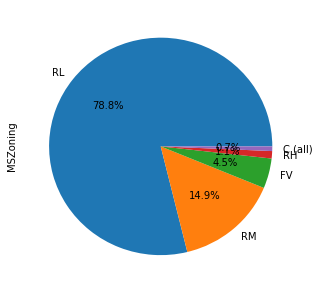

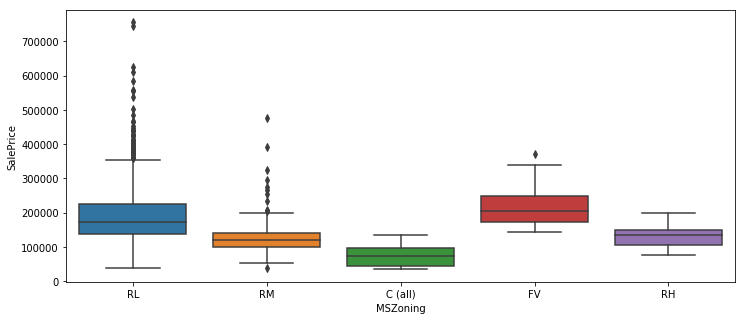

-------------------------------------------------------------------------------------------------------------------
 
Variável: Street
['Pave' 'Grvl']
 
       SalePrice                                        
           count        sum           mean           std
Street                                                  
Grvl           6     781143  130190.500000  65446.253991
Pave        1454  263363803  181130.538514  79446.597317
 


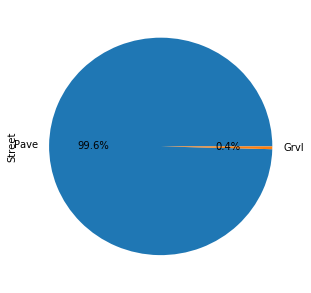

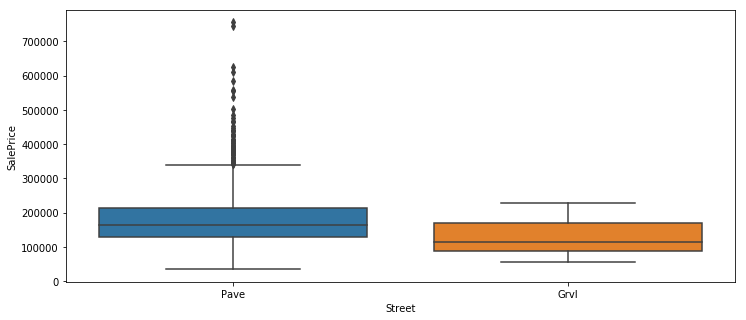

-------------------------------------------------------------------------------------------------------------------
 
Variável: Alley
['NaN' 'Grvl' 'Pave']
 
      SalePrice                                        
          count        sum           mean           std
Alley                                                  
Grvl         50    6110954  122219.080000  34780.780734
NaN        1369  251145968  183452.131483  80667.145180
Pave         41    6888024  168000.585366  38370.375243
 


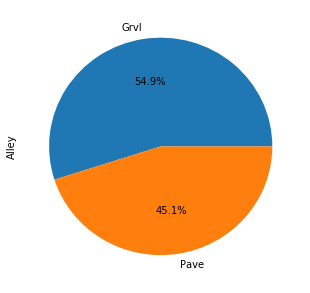

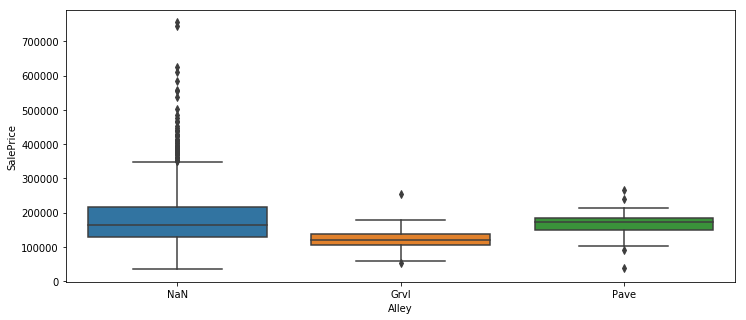

-------------------------------------------------------------------------------------------------------------------
 
Variável: LotShape
['Reg' 'IR1' 'IR2' 'IR3']
 
         SalePrice                                        
             count        sum           mean           std
LotShape                                                  
IR1            484   99753206  206101.665289  85858.489559
IR2             41    9833168  239833.365854  99669.427362
IR3             10    2160365  216036.500000  82540.334855
Reg            925  152398207  164754.818378  69673.427215
 


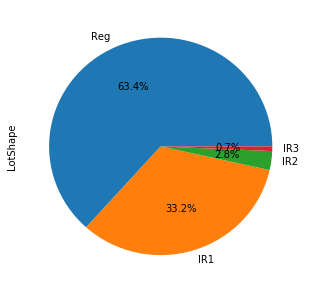

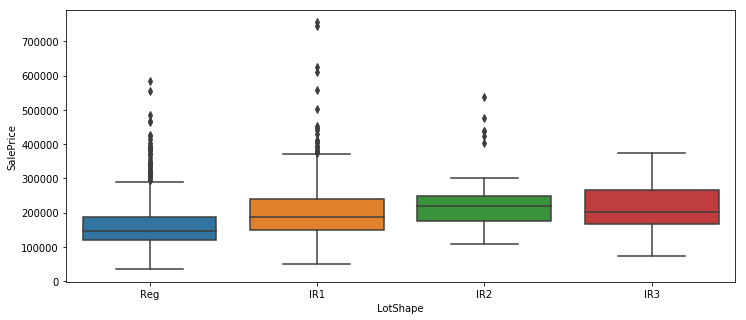

-------------------------------------------------------------------------------------------------------------------
 
Variável: LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
 
            SalePrice                                         
                count        sum           mean            std
LandContour                                                   
Bnk                63    9015557  143104.079365   49361.244074
HLS                50   11576697  231533.940000  101790.139741
Low                36    7331800  203661.111111   83935.353620
Lvl              1311  236220892  180183.746758   78463.567918
 


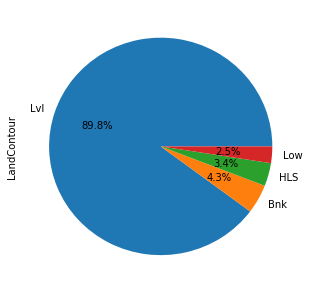

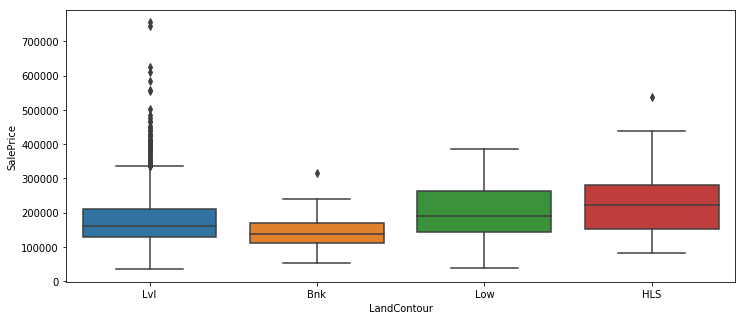

-------------------------------------------------------------------------------------------------------------------
 
Variável: Utilities
['AllPub' 'NoSeWa']
 
          SalePrice                                       
              count        sum          mean           std
Utilities                                                 
AllPub         1459  264007446  180950.95682  79461.599814
NoSeWa            1     137500  137500.00000           NaN
 


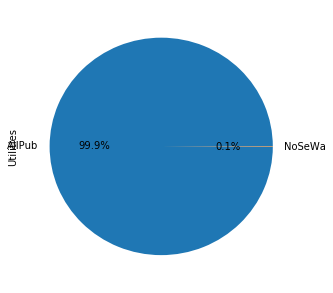

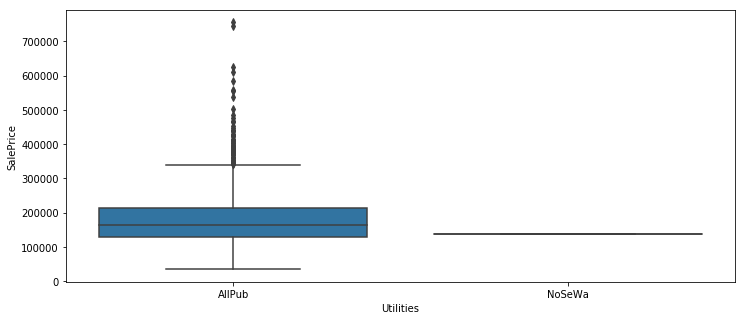

-------------------------------------------------------------------------------------------------------------------
 
Variável: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
 
          SalePrice                                        
              count        sum           mean           std
LotConfig                                                  
Corner          263   47766961  181623.425856  84466.041222
CulDSac          94   21042334  223854.617021  93117.546586
FR2              47    8362925  177934.574468  62788.926829
FR3               4     833900  208475.000000  78379.222374
Inside         1052  186138826  176938.047529  76426.805787
 


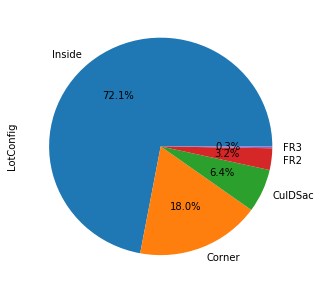

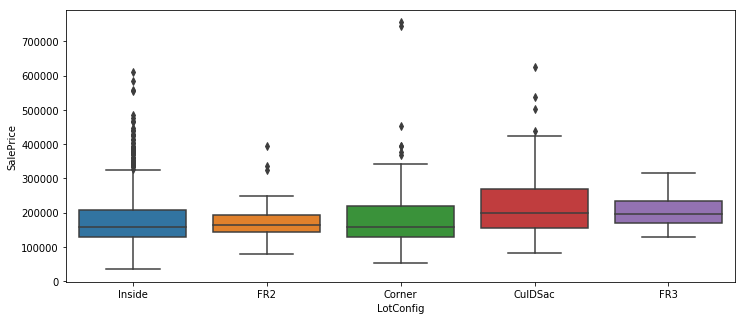

-------------------------------------------------------------------------------------------------------------------
 
Variável: LandSlope
['Gtl' 'Mod' 'Sev']
 
          SalePrice                                        
              count        sum           mean           std
LandSlope                                                  
Gtl            1382  248700297  179956.799566  78669.369151
Mod              65   12787719  196734.138462  92375.358116
Sev              13    2656930  204379.230769  86729.922409
 


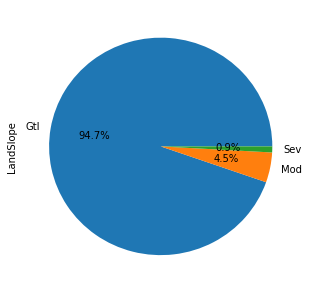

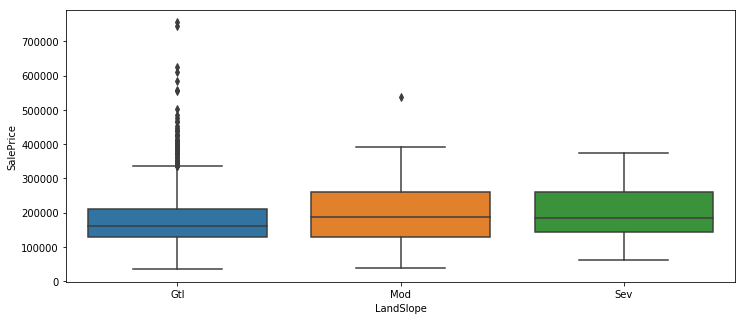

-------------------------------------------------------------------------------------------------------------------
 
Variável: Neighborhood
Variável com 25 valores distintos, recomendamos algum tratamento nesta informação para redução de classes.
 
-------------------------------------------------------------------------------------------------------------------
 
Variável: Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
 
           SalePrice                                        
               count        sum           mean           std
Condition1                                                  
Artery            48    6484400  135091.666667  66226.660548
Feedr             81   11540514  142475.481481  42157.290117
Norm            1260  232464320  184495.492063  81256.980125
PosA               8    1807000  225875.000000  52348.932313
PosN              19    4088500  215184.210526  65256.536609
RRAe              11    1522400  138400.000000  24030

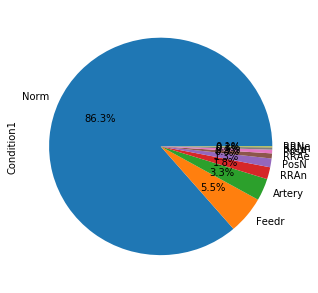

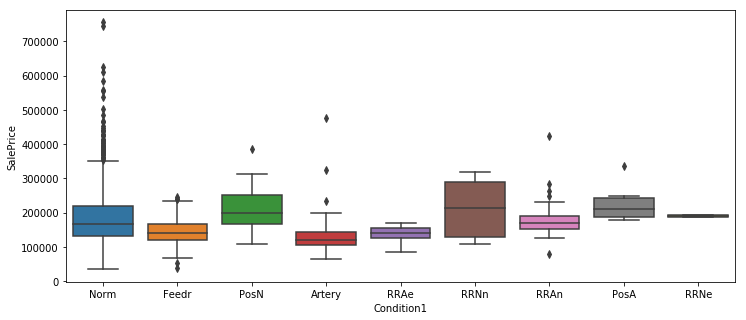

-------------------------------------------------------------------------------------------------------------------
 
Variável: Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
 
           SalePrice                                         
               count        sum           mean            std
Condition2                                                   
Artery             2     213000  106500.000000   16263.455967
Feedr              6     727000  121166.666667   33544.994659
Norm            1445  261789791  181169.405536   79337.735547
PosA               1     325000  325000.000000            NaN
PosN               2     569750  284875.000000  141598.132933
RRAe               1     190000  190000.000000            NaN
RRAn               1     136905  136905.000000            NaN
RRNn               2     193500   96750.000000   39951.533137
 


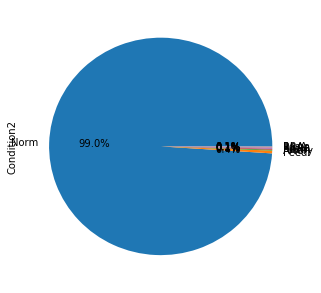

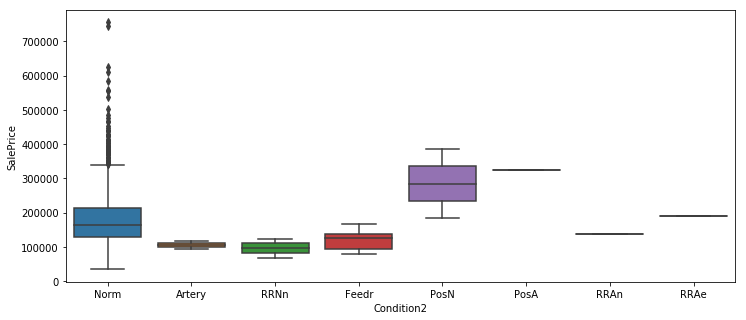

-------------------------------------------------------------------------------------------------------------------
 
Variável: BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
 
         SalePrice                                        
             count        sum           mean           std
BldgType                                                  
1Fam          1220  226631845  185763.807377  82648.502922
2fmCon          31    3981400  128432.258065  35458.545158
Duplex          52    6944136  133541.076923  27833.249197
Twnhs           43    5844200  135911.627907  41013.222080
TwnhsE         114   20743365  181959.342105  60626.108918
 


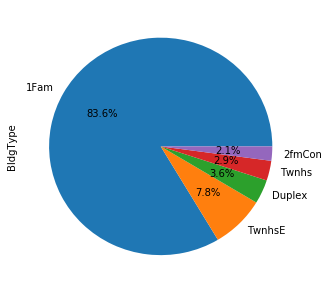

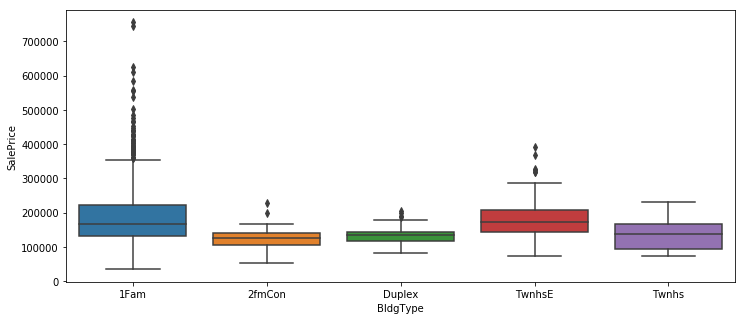

-------------------------------------------------------------------------------------------------------------------
 
Variável: HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
 
           SalePrice                                         
               count        sum           mean            std
HouseStyle                                                   
1.5Fin           154   22039978  143116.740260   54277.941119
1.5Unf            14    1542100  110150.000000   19036.473090
1Story           726  127765457  175985.477961   77055.715011
2.5Fin             8    1760000  220000.000000  118211.976671
2.5Unf            11    1730900  157354.545455   63934.128032
2Story           445   93473035  210051.764045   87339.213570
SFoyer            37    4997756  135074.486486   30480.898192
SLvl              65   10835720  166703.384615   38305.161339
 


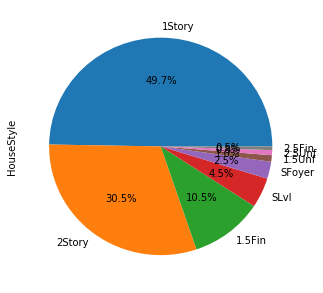

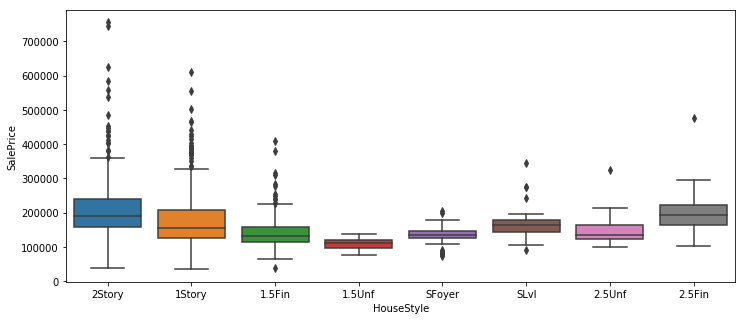

-------------------------------------------------------------------------------------------------------------------
 
Variável: RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
 
          SalePrice                                         
              count        sum           mean            std
RoofStyle                                                   
Flat             13    2530970  194690.000000   62522.963515
Gable          1141  195663194  171483.956179   66331.237296
Gambrel          11    1638000  148909.090909   67013.527807
Hip             286   62598803  218876.933566  111549.603563
Mansard           7    1263979  180568.428571   58057.624627
Shed              2     450000  225000.000000   49497.474683
 


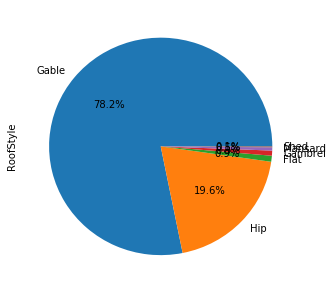

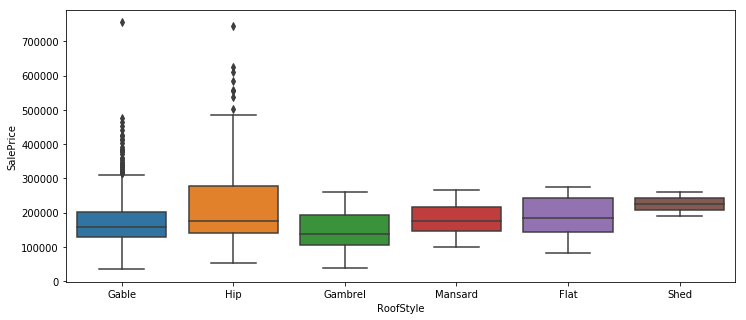

-------------------------------------------------------------------------------------------------------------------
 
Variável: RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll' 'ClyTile']
 
         SalePrice                                         
             count        sum           mean            std
RoofMatl                                                   
ClyTile          1     160000  160000.000000            NaN
CompShg       1434  257838476  179803.679219   77722.388636
Membran          1     241500  241500.000000            NaN
Metal            1     180000  180000.000000            NaN
Roll             1     137000  137000.000000            NaN
Tar&Grv         11    2039470  185406.363636   65430.141720
WdShake          5    1207000  241400.000000   36218.779659
WdShngl          6    2341500  390250.000000  206969.019421
 


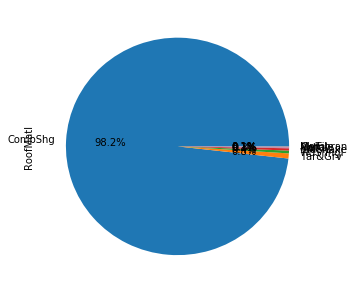

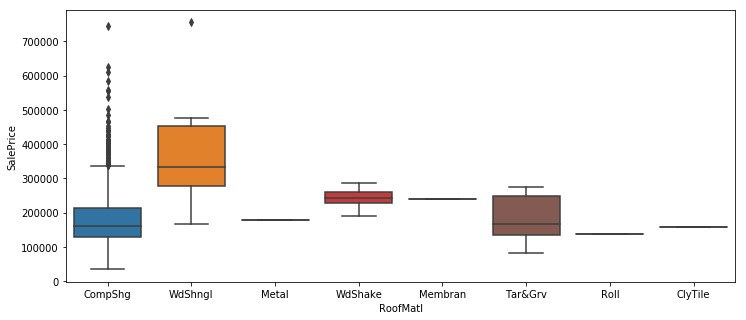

-------------------------------------------------------------------------------------------------------------------
 
Variável: Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
 
            SalePrice                                         
                count        sum           mean            std
Exterior1st                                                   
AsbShng            20    2147711  107385.550000   33756.480660
AsphShn             1     100000  100000.000000            NaN
BrkComm             2     142000   71000.000000   15556.349186
BrkFace            50    9728650  194573.000000   82841.914370
CBlock              1     105000  105000.000000            NaN
CemntBd            61   14133130  231690.655738  120575.621318
HdBoard           222   36203194  163077.450450   66305.714164
ImStucc             1     262000  262000.000000            NaN
MetalSd        

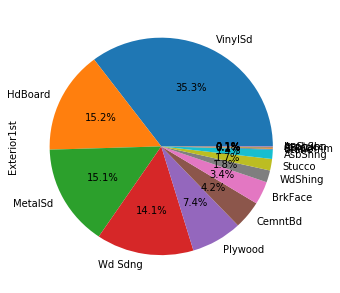

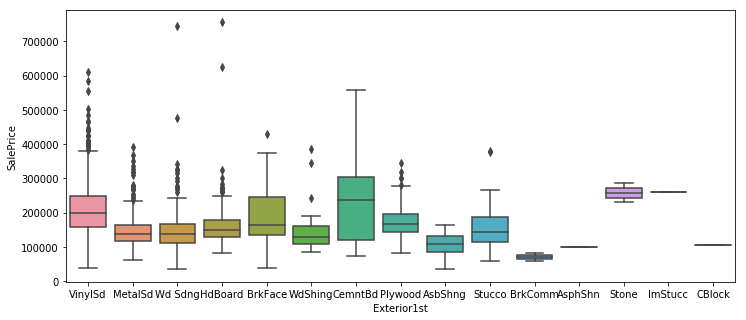

-------------------------------------------------------------------------------------------------------------------
 
Variável: Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone' 'Other'
 'CBlock']
 
            SalePrice                                         
                count        sum           mean            std
Exterior2nd                                                   
AsbShng            20    2281211  114060.550000   42315.043608
AsphShn             3     414000  138000.000000   37509.998667
Brk Cmn             7     887000  126714.285714   38693.084161
BrkFace            25    4895450  195818.000000   95097.551756
CBlock              1     105000  105000.000000            NaN
CmentBd            60   13805630  230093.833333  116140.396221
HdBoard           207   34705944  167661.565217   70061.078357
ImStucc            10    2520700  252070.000000  193176.672447
MetalSd

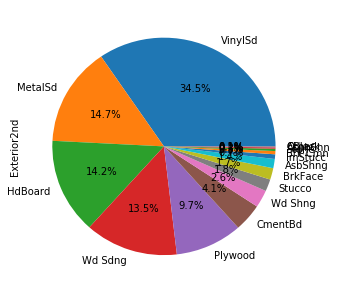

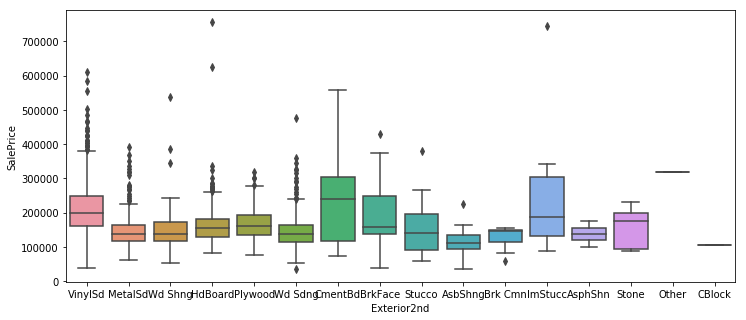

-------------------------------------------------------------------------------------------------------------------
 
Variável: MasVnrType
['BrkFace' 'None' 'Stone' 'BrkCmn' 'NaN']
 
           SalePrice                                        
               count        sum           mean           std
MasVnrType                                                  
BrkCmn            15    2194771  146318.066667  46187.583632
BrkFace          445   91087883  204691.871910  81214.293554
NaN                8    1891874  236484.250000  93964.474968
None             864  134975714  156221.891204  60708.262798
Stone            128   33994704  265583.625000  99940.156577
 


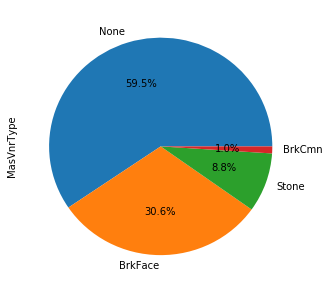

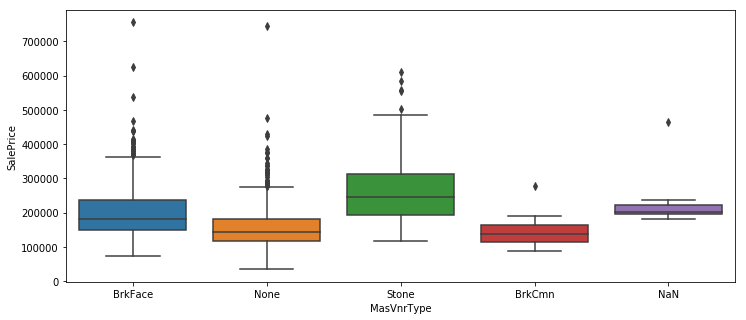

-------------------------------------------------------------------------------------------------------------------
 
Variável: ExterQual
['Gd' 'TA' 'Ex' 'Fa']
 
          SalePrice                                         
              count        sum           mean            std
ExterQual                                                   
Ex               52   19102770  367360.961538  116401.264200
Fa               14    1231793   87985.214286   39826.918794
Gd              488  113037153  231633.510246   71188.873899
TA              906  130773230  144341.313466   42471.815703
 


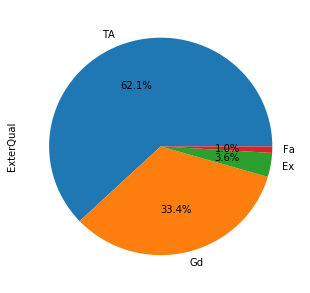

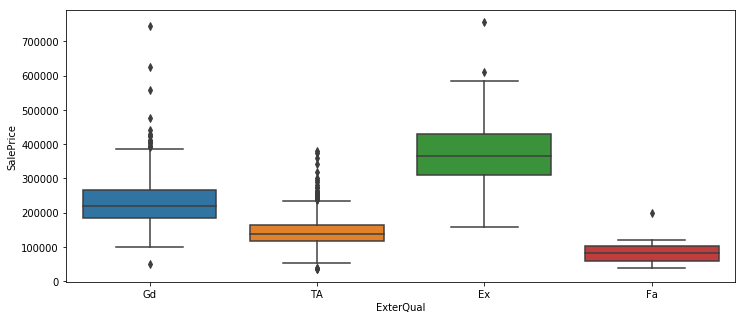

-------------------------------------------------------------------------------------------------------------------
 
Variável: ExterCond
['TA' 'Gd' 'Fa' 'Po' 'Ex']
 
          SalePrice                                         
              count        sum           mean            std
ExterCond                                                   
Ex                3     604000  201333.333333  109235.220205
Fa               28    2872664  102595.142857   40094.383940
Gd              146   24659045  168897.568493   72608.303632
Po                1      76500   76500.000000            NaN
TA             1282  235932737  184034.896256   79806.257233
 


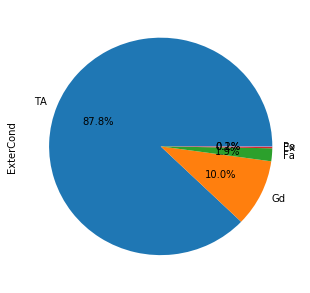

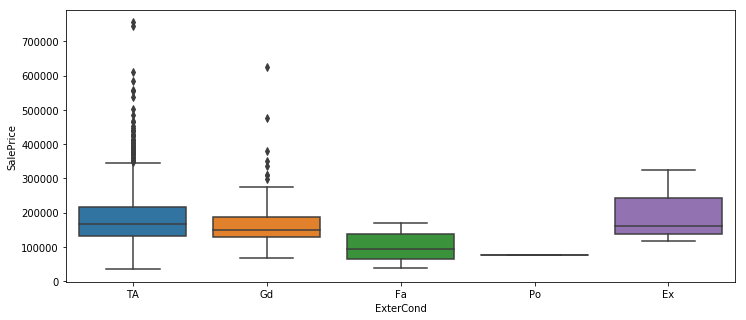

-------------------------------------------------------------------------------------------------------------------
 
Variável: Foundation
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
 
           SalePrice                                        
               count        sum           mean           std
Foundation                                                  
BrkTil           146   19314497  132291.075342  54592.393032
CBlock           634   94976823  149805.714511  48295.041759
PConc            647  145724096  225230.442040  86865.977283
Slab              24    2576775  107365.625000  34213.980939
Stone              6     995755  165959.166667  78557.704413
Wood               3     557000  185666.666667  56695.090910
 


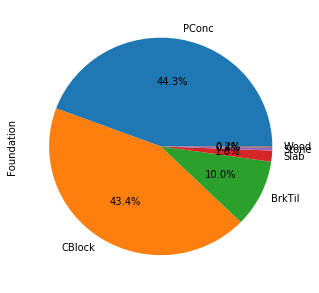

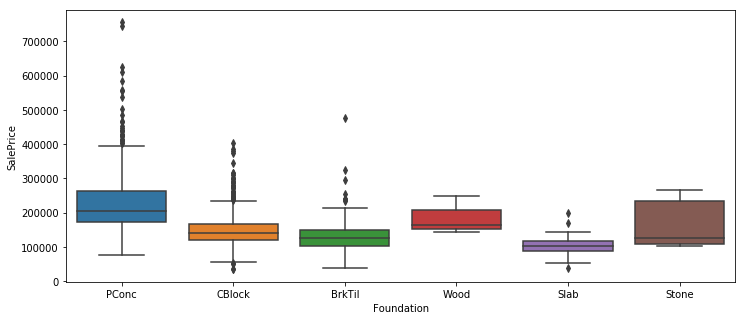

-------------------------------------------------------------------------------------------------------------------
 
Variável: BsmtQual
['Gd' 'TA' 'Ex' 'NaN' 'Fa']
 
         SalePrice                                         
             count        sum           mean            std
BsmtQual                                                   
Ex             121   39571966  327041.041322  113563.237392
Fa              35    4049221  115692.028571   34469.667278
Gd             618  125261480  202688.478964   58092.364284
NaN             37    3909157  105652.891892   29278.694797
TA             649   91353122  140759.818182   43483.265311
 


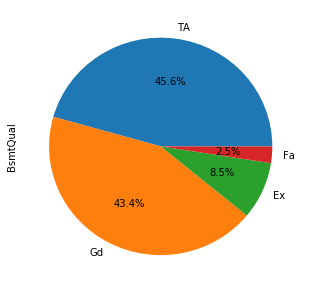

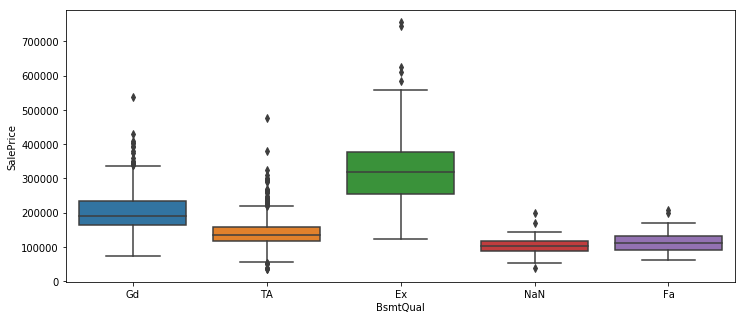

-------------------------------------------------------------------------------------------------------------------
 
Variável: BsmtCond
['TA' 'Gd' 'NaN' 'Fa' 'Po']
 
         SalePrice                                        
             count        sum           mean           std
BsmtCond                                                  
Fa              45    5481429  121809.533333  43467.796975
Gd              65   13883994  213599.907692  72663.155026
NaN             37    3909157  105652.891892  29278.694797
Po               2     128000   64000.000000   4242.640687
TA            1311  240742366  183632.620900  79515.388449
 


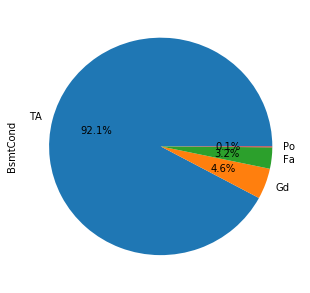

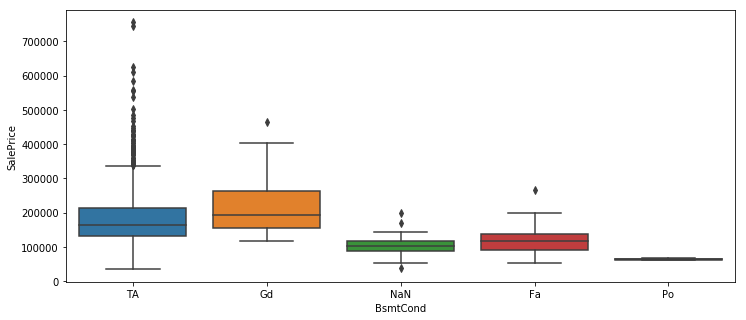

-------------------------------------------------------------------------------------------------------------------
 
Variável: BsmtExposure
['No' 'Gd' 'Mn' 'Av' 'NaN']
 
             SalePrice                                         
                 count        sum           mean            std
BsmtExposure                                                   
Av                 221   45668196  206643.420814   88655.504849
Gd                 134   34530434  257689.805970  118923.672583
Mn                 114   21978021  192789.657895   77335.442652
NaN                 38    4101657  107938.342105   32133.440664
No                 953  157866638  165652.295908   60695.724915
 


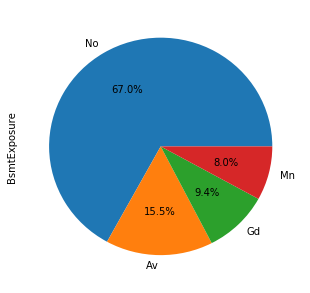

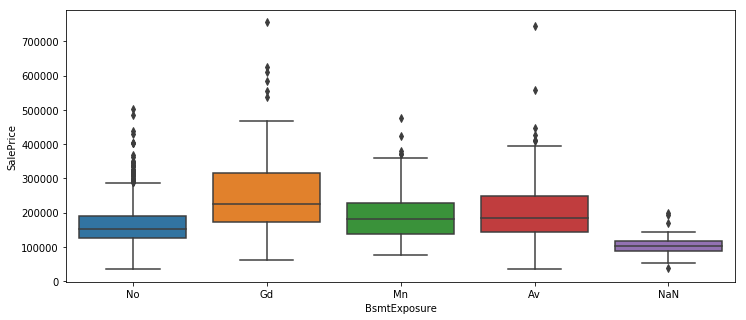

-------------------------------------------------------------------------------------------------------------------
 
Variável: BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NaN' 'LwQ']
 
             SalePrice                                       
                 count       sum           mean           std
BsmtFinType1                                                 
ALQ                220  35546075  161573.068182  50821.277231
BLQ                148  22125061  149493.655405  47327.292126
GLQ                418  98402935  235413.720096  93215.613258
LwQ                 74  11237100  151852.702703  50796.987083
NaN                 37   3909157  105652.891892  29278.694797
Rec                133  19536270  146889.248120  45190.118879
Unf                430  73388348  170670.576744  72577.080129
 


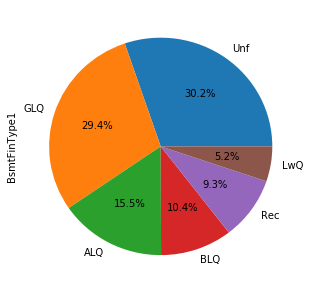

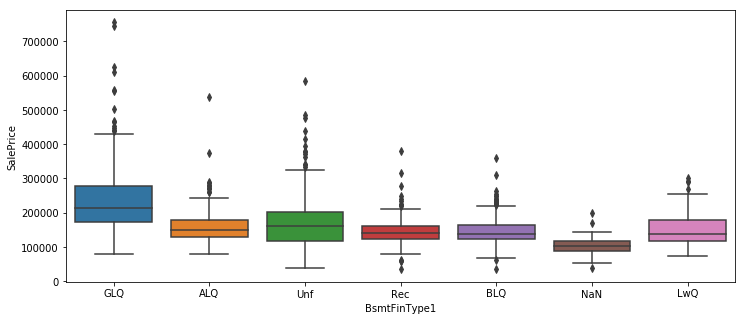

-------------------------------------------------------------------------------------------------------------------
 
Variável: BsmtFinType2
['Unf' 'BLQ' 'NaN' 'ALQ' 'Rec' 'LwQ' 'GLQ']
 
             SalePrice                                         
                 count        sum           mean            std
BsmtFinType2                                                   
ALQ                 19    3988900  209942.105263  104764.743411
BLQ                 33    4986333  151101.000000   41611.305388
GLQ                 14    2533750  180982.142857   64573.040359
LwQ                 46    7560750  164364.130435   43255.035241
NaN                 38    4193157  110346.236842   40879.307312
Rec                 54    8905525  164917.129630   59183.277020
Unf               1256  231976531  184694.690287   81275.313909
 


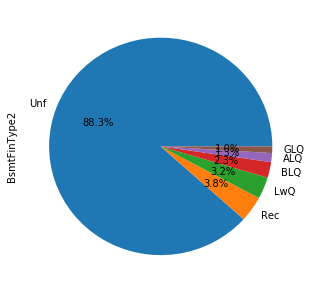

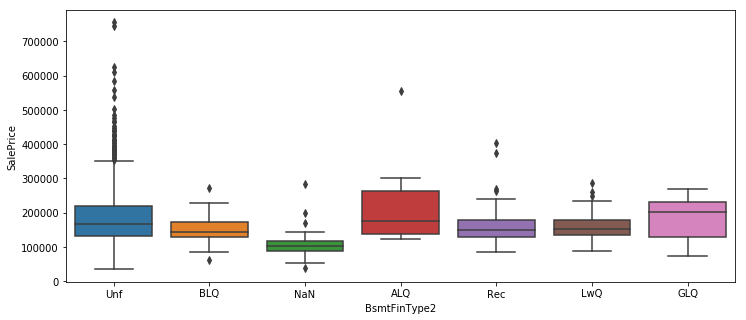

-------------------------------------------------------------------------------------------------------------------
 
Variável: Heating
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
 
        SalePrice                                        
            count        sum           mean           std
Heating                                                  
Floor           1      72500   72500.000000           NaN
GasA         1428  259926267  182021.195378  79262.873587
GasW           18    2999379  166632.166667  78547.575324
Grav            7     526900   75271.428571  28066.570524
OthW            2     251500  125750.000000   5303.300859
Wall            4     368400   92100.000000   4509.988914
 


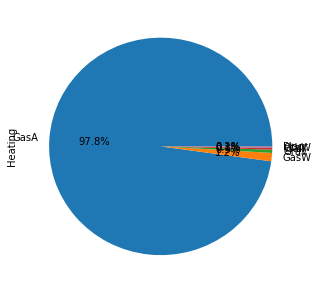

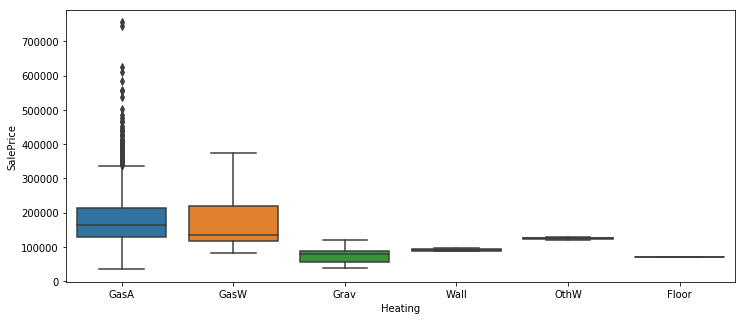

-------------------------------------------------------------------------------------------------------------------
 
Variável: HeatingQC
['Ex' 'Gd' 'TA' 'Fa' 'Po']
 
          SalePrice                                        
              count        sum           mean           std
HeatingQC                                                  
Ex              741  159251592  214914.429150  87469.704503
Fa               49    6072055  123919.489796  50306.618996
Gd              241   37802988  156858.871369  52923.920003
Po                1      87000   87000.000000           NaN
TA              428   60931311  142362.876168  47226.485663
 


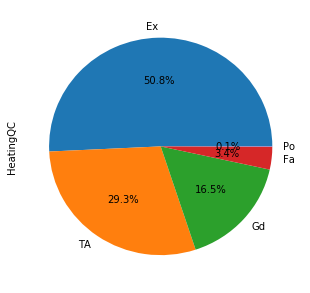

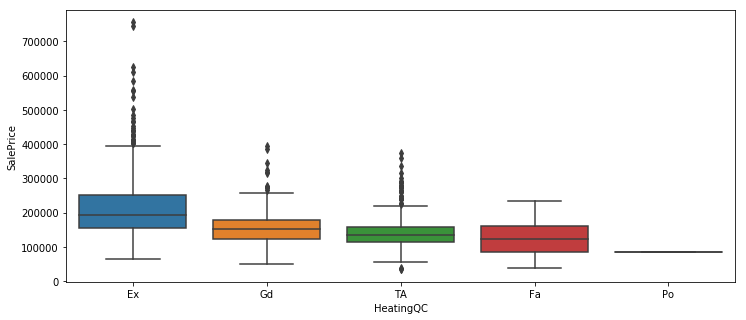

-------------------------------------------------------------------------------------------------------------------
 
Variável: CentralAir
['Y' 'N']
 
           SalePrice                                        
               count        sum           mean           std
CentralAir                                                  
N                 95   10000087  105264.073684  40671.273961
Y               1365  254144859  186186.709890  78805.206820
 


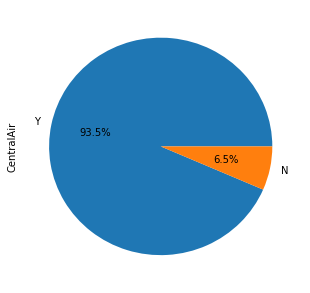

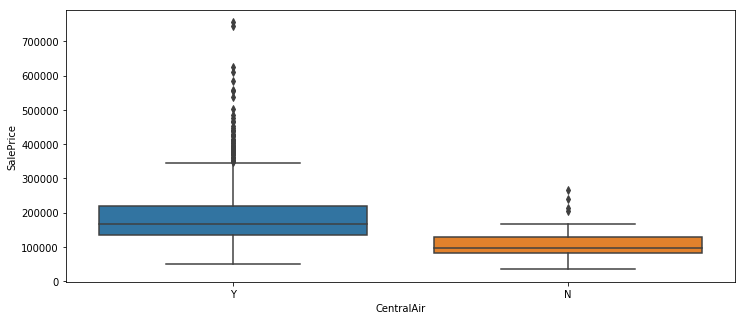

-------------------------------------------------------------------------------------------------------------------
 
Variável: Electrical
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'NaN']
 
           SalePrice                                        
               count        sum           mean           std
Electrical                                                  
FuseA             94   11486508  122196.893617  37511.376615
FuseF             27    2907237  107675.444444  30636.507376
FuseP              3     292000   97333.333333  34645.827070
Mix                1      67000   67000.000000           NaN
NaN                1     167500  167500.000000           NaN
SBrkr           1334  249224701  186825.113193  79856.458326
 


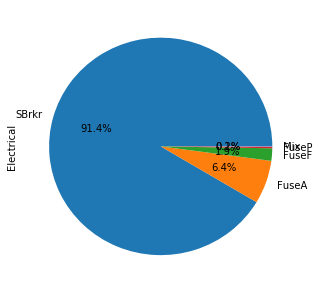

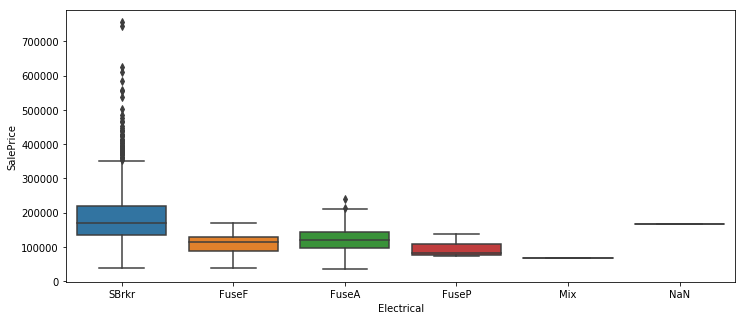

-------------------------------------------------------------------------------------------------------------------
 
Variável: KitchenQual
['Gd' 'TA' 'Ex' 'Fa']
 
            SalePrice                                         
                count        sum           mean            std
KitchenQual                                                   
Ex                100   32855467  328554.670000  120862.942573
Fa                 39    4117043  105565.205128   36004.254037
Gd                586  124299990  212116.023891   64020.176702
TA                735  102872446  139962.511565   38896.280336
 


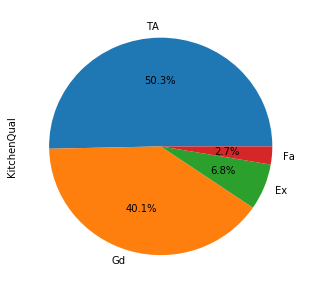

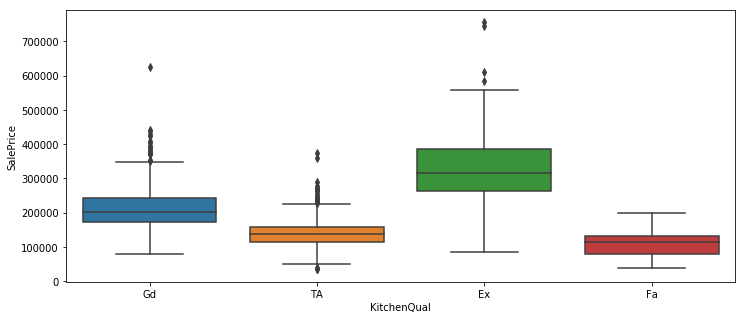

-------------------------------------------------------------------------------------------------------------------
 
Variável: Functional
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
 
           SalePrice                                         
               count        sum           mean            std
Functional                                                   
Maj1              14    2155274  153948.142857   64503.775815
Maj2               5     429000   85800.000000   27086.897201
Min1              31    4537950  146385.483871   38089.572487
Min2              34    4904182  144240.647059   41215.354652
Mod               15    2525900  168393.333333  118938.666467
Sev                1     129000  129000.000000            NaN
Typ             1360  249463640  183429.147059   80017.959658
 


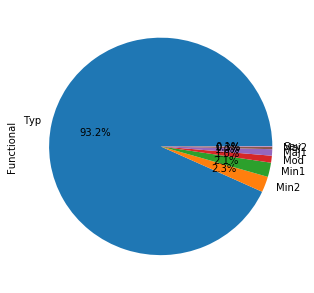

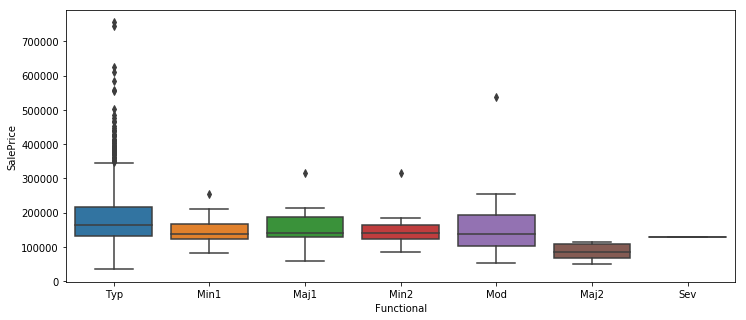

-------------------------------------------------------------------------------------------------------------------
 
Variável: FireplaceQu
['NaN' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
 
            SalePrice                                        
                count       sum           mean            std
FireplaceQu                                                  
Ex                 24   8105100  337712.500000  123611.471764
Fa                 33   5520850  167298.484848   34287.717564
Gd                380  86013538  226351.415789   91123.148369
NaN               690  97518723  141331.482609   44389.786884
Po                 20   2595283  129764.150000   31080.842115
TA                313  64391452  205723.488818   71367.028772
 


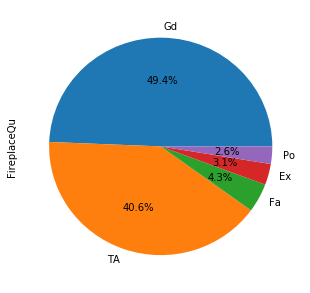

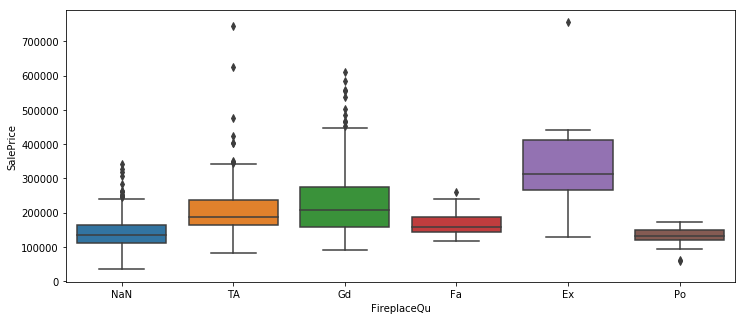

-------------------------------------------------------------------------------------------------------------------
 
Variável: GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NaN' 'Basment' '2Types']
 
           SalePrice                                         
               count        sum           mean            std
GarageType                                                   
2Types             6     907700  151283.333333   34917.068415
Attchd           870  176516611  202892.656322   77146.621778
Basment           19    3050843  160570.684211   63967.283574
BuiltIn           88   22418153  254751.738636  102230.854394
CarPort            9     989659  109962.111111   24638.183681
Detchd           387   51893280  134091.162791   41391.549953
NaN               81    8368700  103317.283951   32815.023389
 


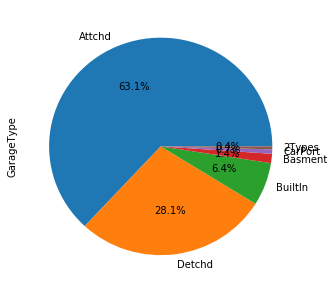

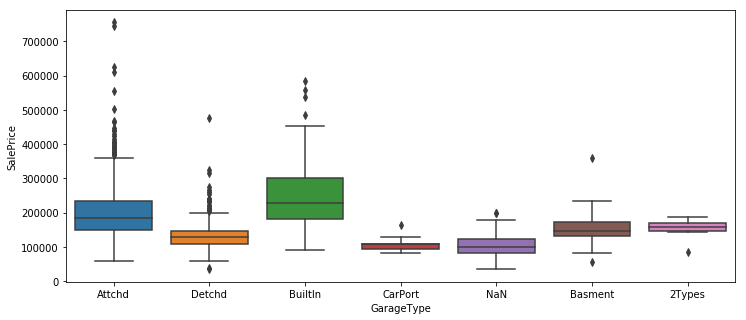

-------------------------------------------------------------------------------------------------------------------
 
Variável: GarageFinish
['RFn' 'Unf' 'Fin' 'NaN']
 
             SalePrice                                       
                 count       sum           mean           std
GarageFinish                                                 
Fin                352  84498547  240052.690341  96960.593232
NaN                 81   8368700  103317.283951  32815.023389
RFn                422  85273063  202068.869668  63536.222518
Unf                605  86004636  142156.423140  46498.528211
 


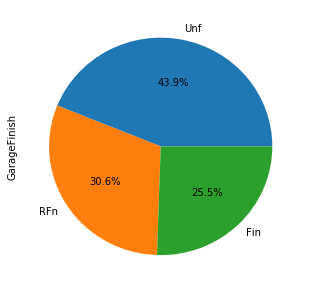

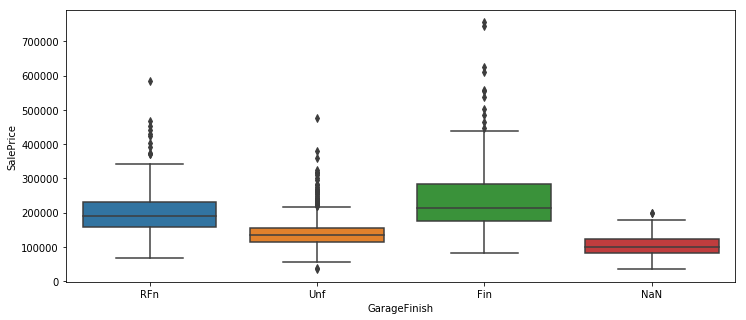

-------------------------------------------------------------------------------------------------------------------
 
Variável: GarageQual
['TA' 'Fa' 'Gd' 'NaN' 'Ex' 'Po']
 
           SalePrice                                         
               count        sum           mean            std
GarageQual                                                   
Ex                 3     723000  241000.000000  202680.166765
Fa                48    5931521  123573.354167   42971.440985
Gd                14    3022050  215860.714286   74126.739021
NaN               81    8368700  103317.283951   32815.023389
Po                 3     300500  100166.666667   35143.752408
TA              1311  245799175  187489.836003   78774.948567
 


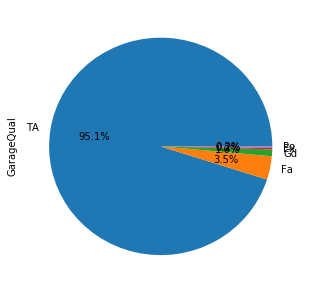

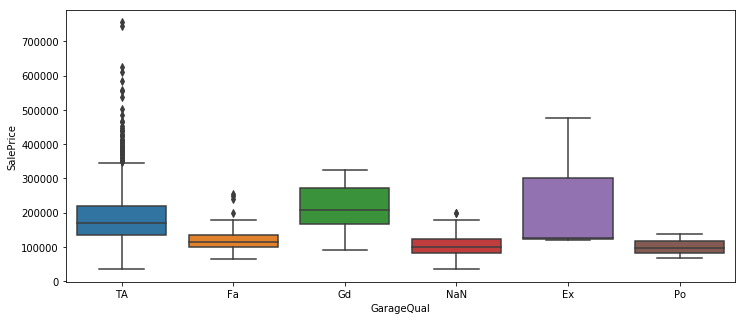

-------------------------------------------------------------------------------------------------------------------
 
Variável: GarageCond
['TA' 'Fa' 'NaN' 'Gd' 'Po' 'Ex']
 
           SalePrice                                        
               count        sum           mean           std
GarageCond                                                  
Ex                 2     248000  124000.000000   4949.747468
Fa                35    4012891  114654.028571  36420.903588
Gd                 9    1619370  179930.000000  64769.318354
NaN               81    8368700  103317.283951  32815.023389
Po                 7     759500  108500.000000  22662.377045
TA              1326  249136485  187885.735294  79103.322640
 


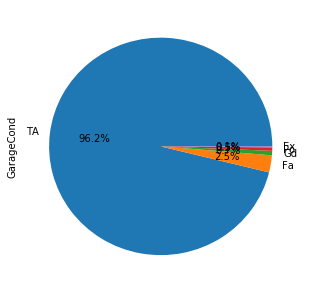

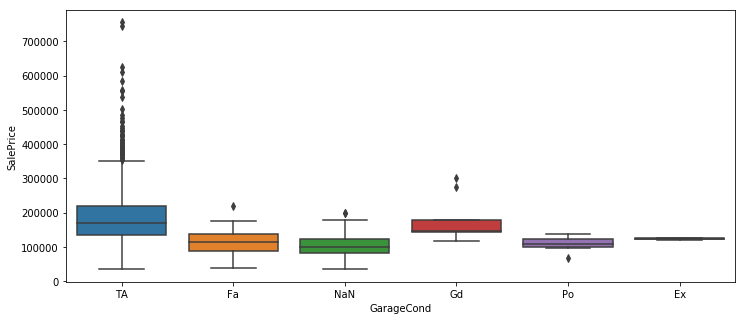

-------------------------------------------------------------------------------------------------------------------
 
Variável: PavedDrive
['Y' 'N' 'P']
 
           SalePrice                                        
               count        sum           mean           std
PavedDrive                                                  
N                 90   10353521  115039.122222  44352.523309
P                 30    3969900  132330.000000  33503.030228
Y               1340  249821525  186433.973881  79665.503047
 


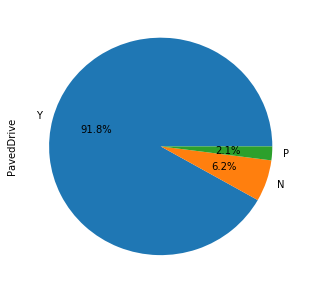

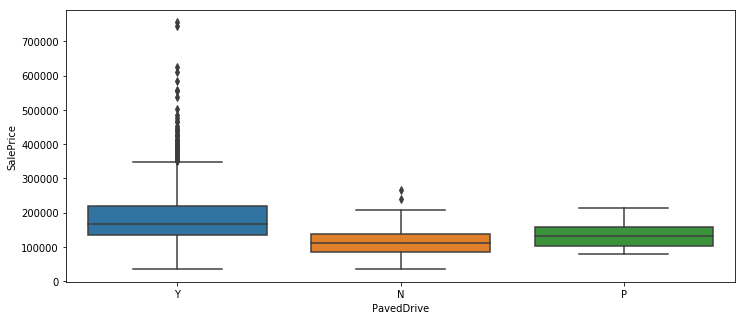

-------------------------------------------------------------------------------------------------------------------
 
Variável: PoolQC
['NaN' 'Ex' 'Fa' 'Gd']
 
       SalePrice                                         
           count        sum           mean            std
PoolQC                                                   
Ex             2     980000  490000.000000  360624.458405
Fa             2     431000  215500.000000   48790.367902
Gd             3     605970  201990.000000   63441.392639
NaN         1453  262127976  180404.663455   78168.872519
 


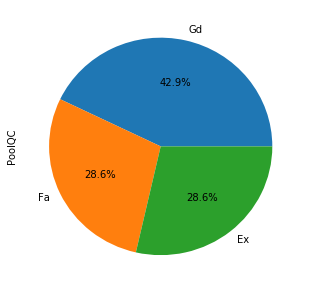

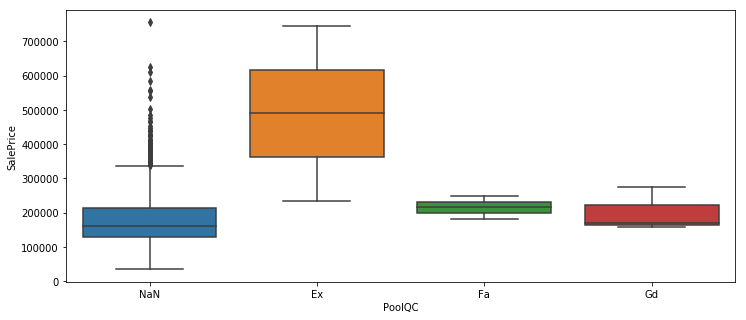

-------------------------------------------------------------------------------------------------------------------
 
Variável: Fence
['NaN' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
 
      SalePrice                                        
          count        sum           mean           std
Fence                                                  
GdPrv        59   10556720  178927.457627  56757.237563
GdWo         54    7580483  140379.314815  53592.585059
MnPrv       157   23353921  148751.089172  66096.069463
MnWw         11    1477150  134286.363636  21781.805376
NaN        1179  221176672  187596.837998  81656.497075
 


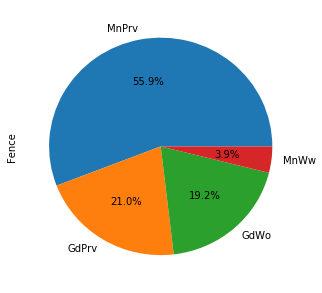

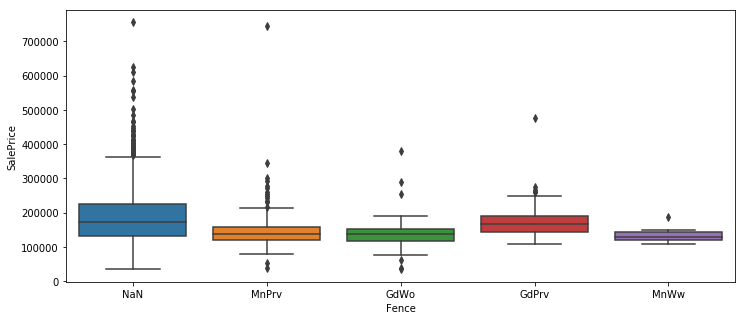

-------------------------------------------------------------------------------------------------------------------
 
Variável: MiscFeature
['NaN' 'Shed' 'Gar2' 'Othr' 'TenC']
 
            SalePrice                                        
                count        sum           mean           std
MiscFeature                                                  
Gar2                2     341500  170750.000000  27223.611076
NaN              1406  255957253  182046.410384  80084.136570
Othr                2     188000   94000.000000  55154.328933
Shed               49    7408193  151187.612245  51642.728056
TenC                1     250000  250000.000000           NaN
 


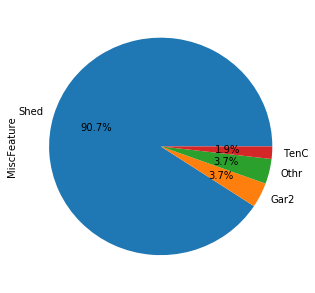

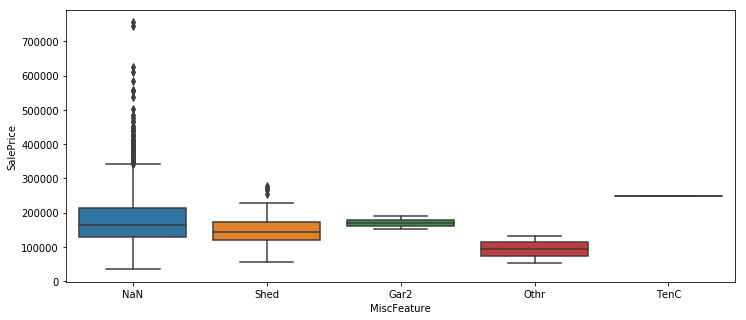

-------------------------------------------------------------------------------------------------------------------
 
Variável: SaleType
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
 
         SalePrice                                         
             count        sum           mean            std
SaleType                                                   
COD             43    6190850  143973.255814   47098.294314
CWD              4     842400  210600.000000   86421.486526
Con              2     539200  269600.000000   76933.217793
ConLD            9    1249028  138780.888889   53876.560647
ConLI            5    1001950  200390.000000  145282.519595
ConLw            5     718500  143700.000000   67291.901444
New            122   33543341  274945.418033  103239.582158
Oth              3     359550  119850.000000   28441.035495
WD            1267  219700127  173401.836622   71129.686245
 


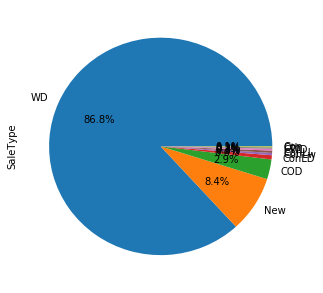

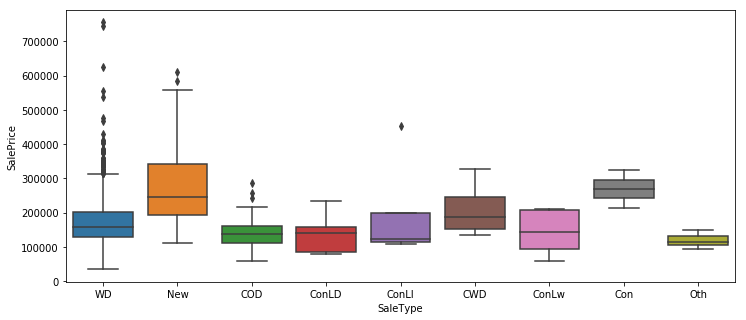

-------------------------------------------------------------------------------------------------------------------
 
Variável: SaleCondition
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
 
              SalePrice                                         
                  count        sum           mean            std
SaleCondition                                                   
Abnorml             101   14799189  146526.623762   82796.213395
AdjLand               4     416500  104125.000000   26135.464411
Alloca               12    2008529  167377.416667   84460.527502
Family               20    2992000  149600.000000   47820.002421
Normal             1198  209892259  175202.219533   69713.636280
Partial             125   34036469  272291.752000  103696.404119
 


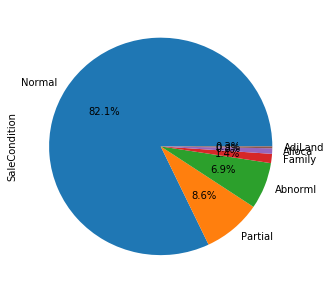

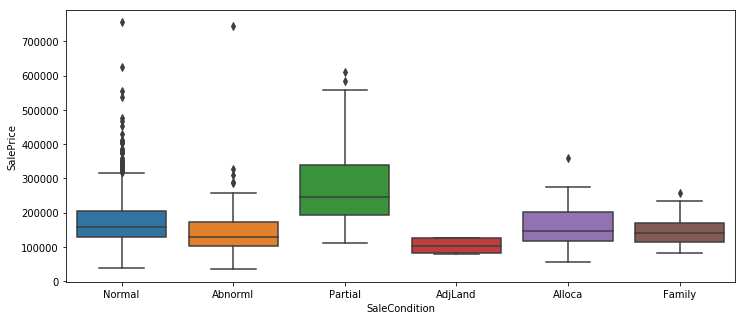

-------------------------------------------------------------------------------------------------------------------
 
Análises das Variáveis Numéricas
 
-------------------------------------------------------------------------------------------------------------------
 
Variável: MSSubClass


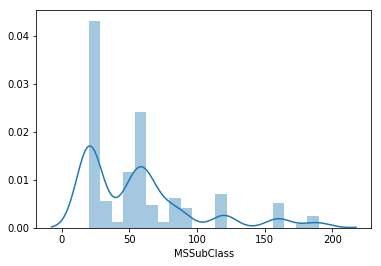

 
Média: 56.897260273972606
DesvioPadrão: 42.30057099381035
 


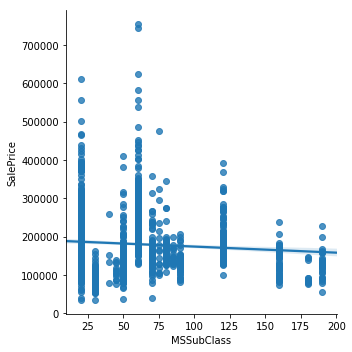

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: LotFrontage


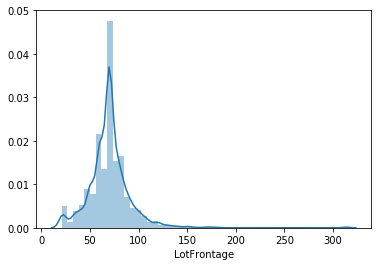

 
Média: 70.04995836802642
DesvioPadrão: 22.024022688706943
 


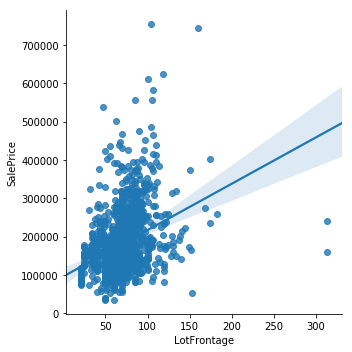

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: LotArea


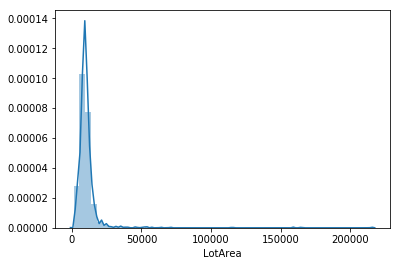

 
Média: 10516.828082191782
DesvioPadrão: 9981.264932379147
 


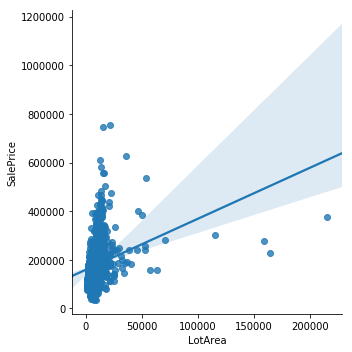

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: OverallQual


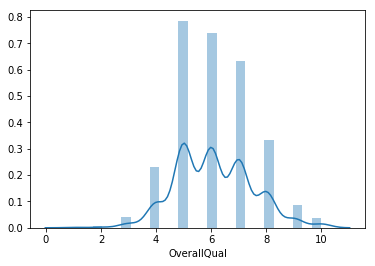

 
Média: 6.0993150684931505
DesvioPadrão: 1.3829965467415923
 


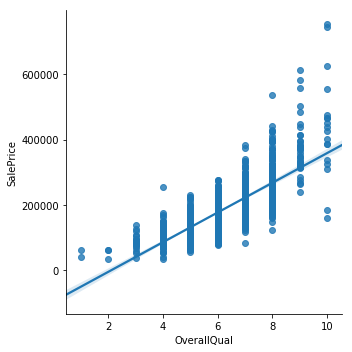

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: OverallCond


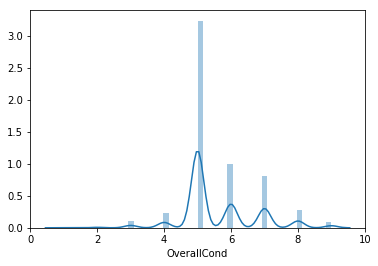

 
Média: 5.575342465753424
DesvioPadrão: 1.1127993367127367
 


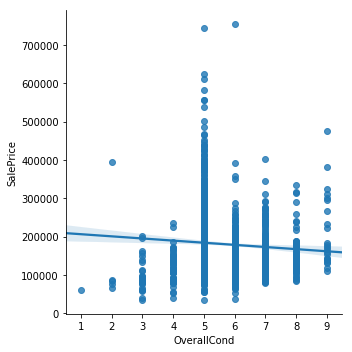

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: YearBuilt


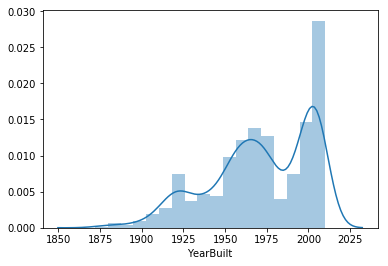

 
Média: 1971.267808219178
DesvioPadrão: 30.202904042525265
 


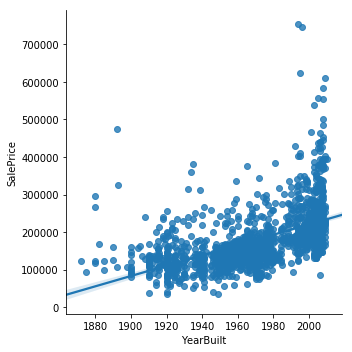

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: YearRemodAdd


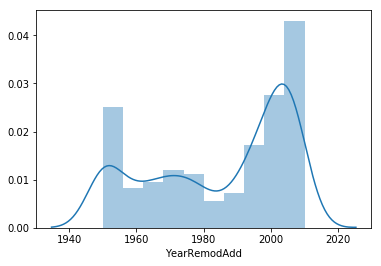

 
Média: 1984.8657534246574
DesvioPadrão: 20.645406807709396
 


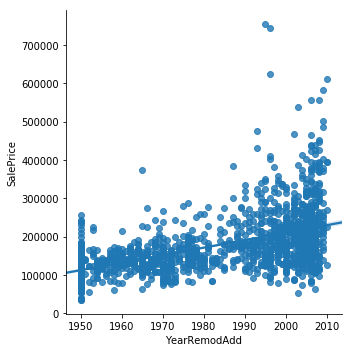

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: MasVnrArea


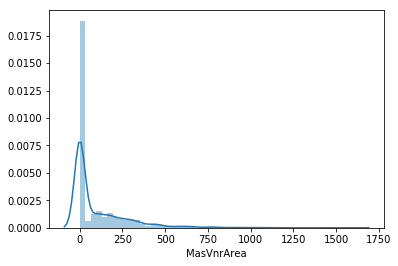

 
Média: 103.68526170798896
DesvioPadrão: 180.5691124259736
 


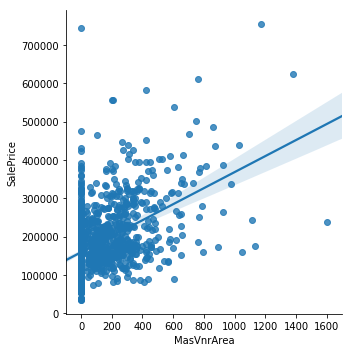

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: BsmtFinSF1


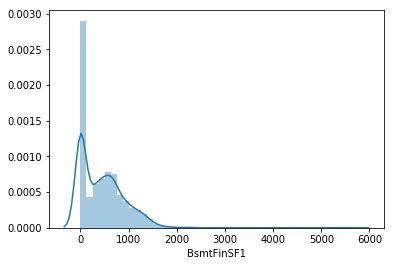

 
Média: 443.6397260273973
DesvioPadrão: 456.09809084092456
 


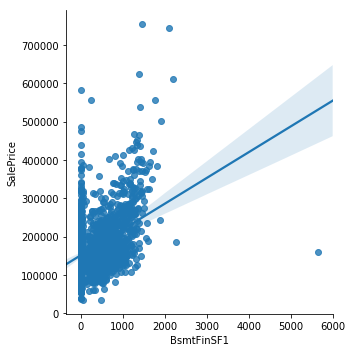

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: BsmtFinSF2


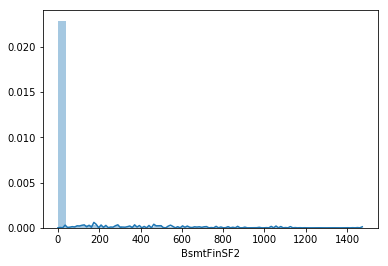

 
Média: 46.54931506849315
DesvioPadrão: 161.31927280654057
 


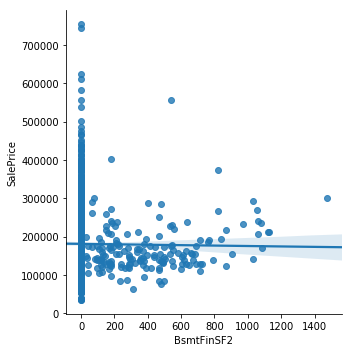

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: BsmtUnfSF


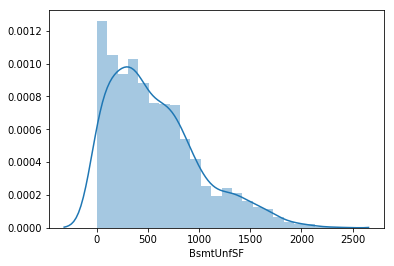

 
Média: 567.2404109589041
DesvioPadrão: 441.8669552924342
 


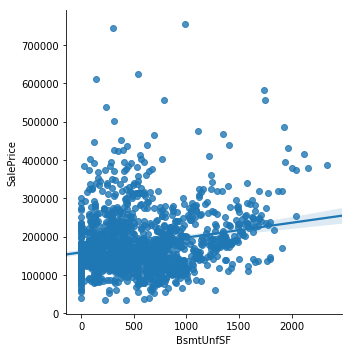

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: TotalBsmtSF


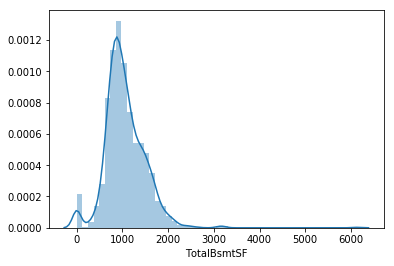

 
Média: 1057.4294520547944
DesvioPadrão: 438.7053244594705
 


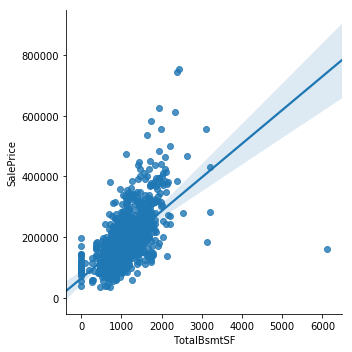

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: 1stFlrSF


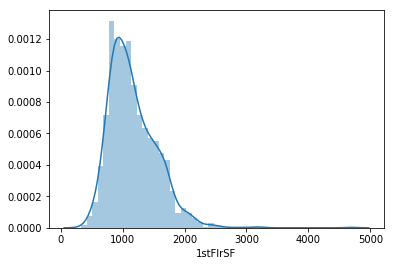

 
Média: 1162.626712328767
DesvioPadrão: 386.5877380410738
 


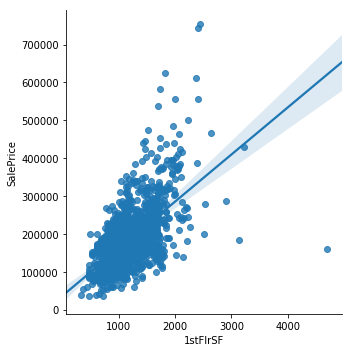

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: 2ndFlrSF


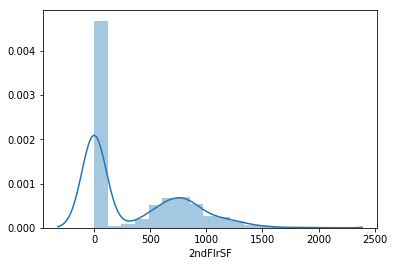

 
Média: 346.99246575342465
DesvioPadrão: 436.5284358862591
 


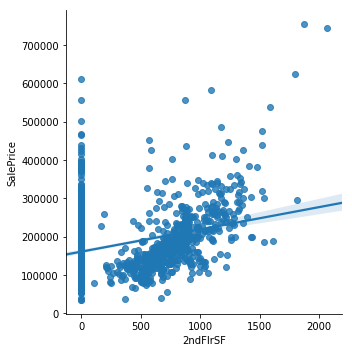

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: LowQualFinSF


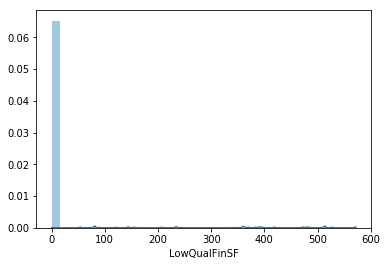

 
Média: 5.844520547945206
DesvioPadrão: 48.623081433519125
 


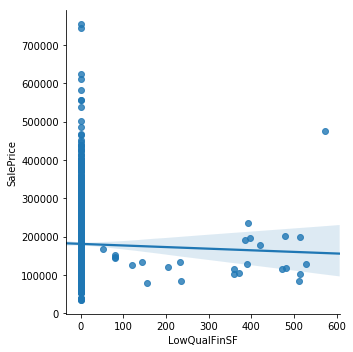

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: GrLivArea


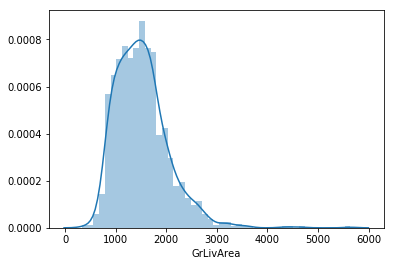

 
Média: 1515.463698630137
DesvioPadrão: 525.4803834232027
 


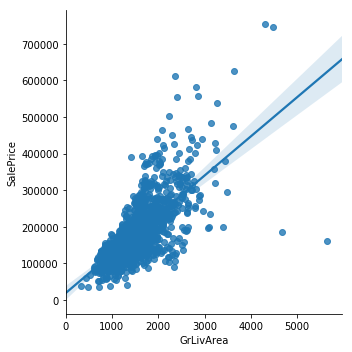

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: BsmtFullBath
[1 0 2 3]
 
             SalePrice                                        
                 count        sum           mean           std
BsmtFullBath                                                  
0                  856  141686524  165521.640187  68137.819610
1                  588  119083476  202522.918367  88895.866415
2                   15    3195946  213063.066667  87308.196346
3                    1     179000  179000.000000           NaN
 


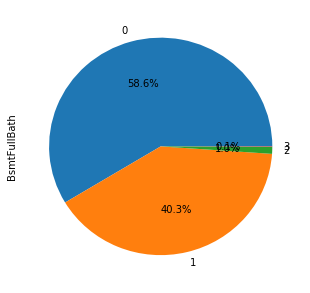

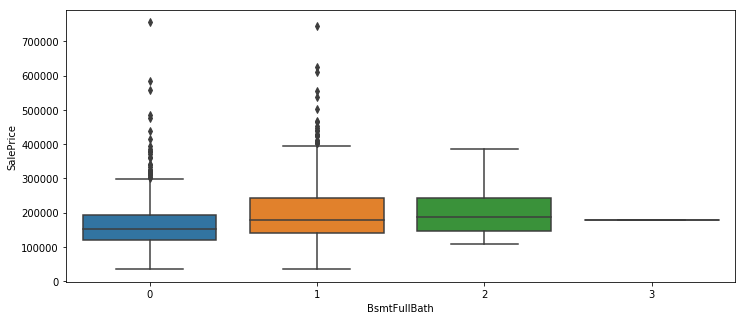

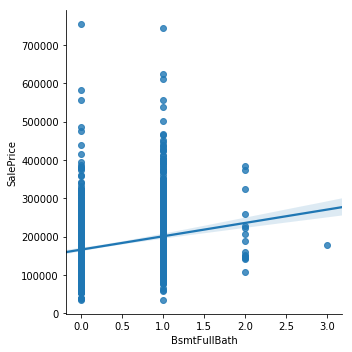

-------------------------------------------------------------------------------------------------------------------
Variável: BsmtHalfBath
[0 1 2]
 
             SalePrice                                        
                 count        sum           mean           std
BsmtHalfBath                                                  
0                 1378  249735395  181230.330189  79303.224623
1                   80   14087850  176098.125000  82901.003355
2                    2     321701  160850.500000  47164.729412
 


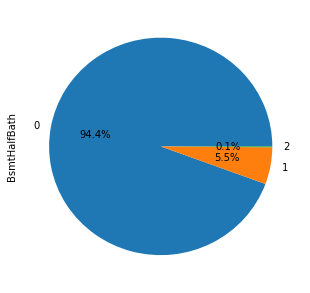

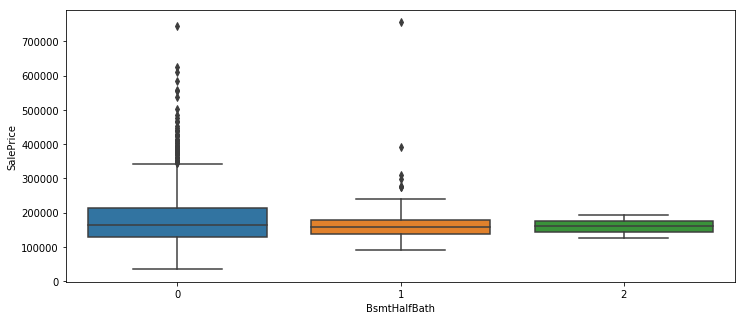

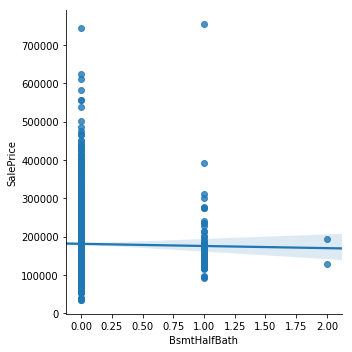

-------------------------------------------------------------------------------------------------------------------
Variável: FullBath
[2 1 3 0]
 
         SalePrice                                         
             count        sum           mean            std
FullBath                                                   
0                9    1486808  165200.888889  106083.806001
1              650   87588436  134751.440000   41565.080488
2              768  163591546  213009.825521   72446.809159
3               33   11478156  347822.909091  165185.455377
 


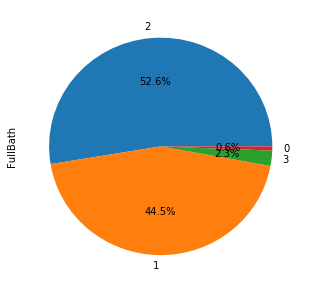

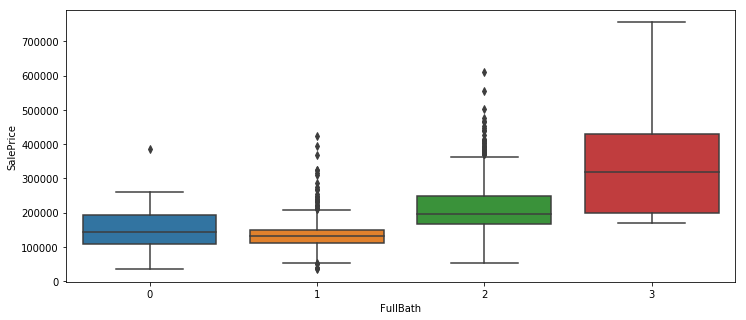

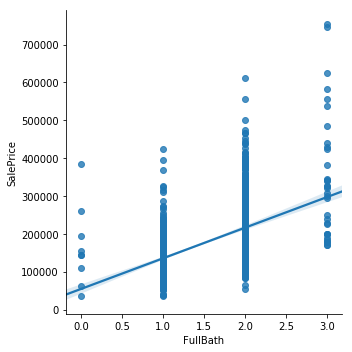

-------------------------------------------------------------------------------------------------------------------
Variável: HalfBath
[1 0 2]
 
         SalePrice                                        
             count        sum           mean           std
HalfBath                                                  
0              913  148394350  162534.884995  67450.336922
1              535  113806249  212721.960748  88629.242668
2               12    1944347  162028.916667  30315.705676
 


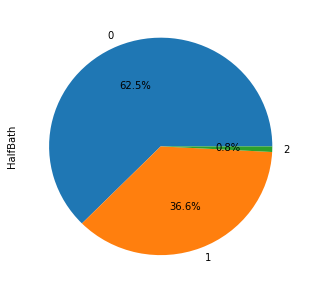

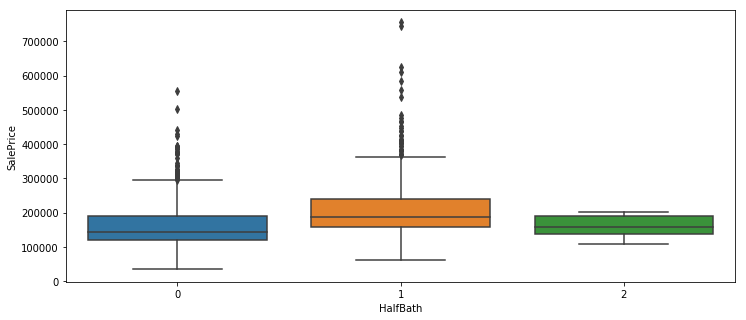

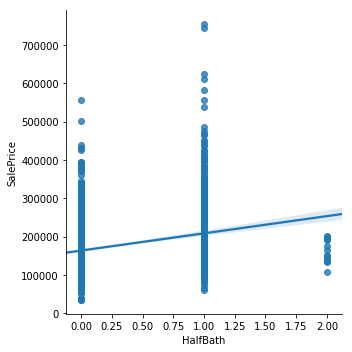

-------------------------------------------------------------------------------------------------------------------
Variável: BedroomAbvGr


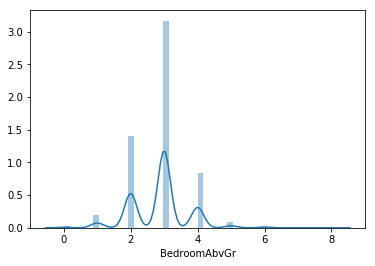

 
Média: 2.8664383561643834
DesvioPadrão: 0.8157780441442212
 


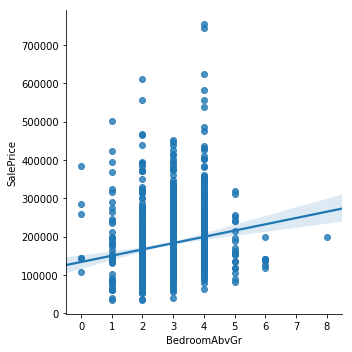

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: KitchenAbvGr
[1 2 3 0]
 
             SalePrice                                        
                 count        sum           mean           std
KitchenAbvGr                                                  
0                    1     127500  127500.000000           NaN
1                 1392  255277196  183388.790230  80265.344315
2                   65    8521250  131096.153846  31483.474549
3                    2     219000  109500.000000   4949.747468
 


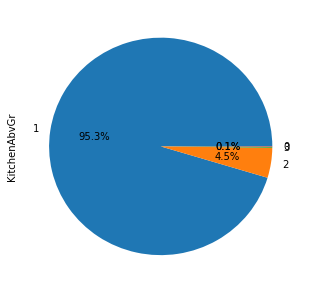

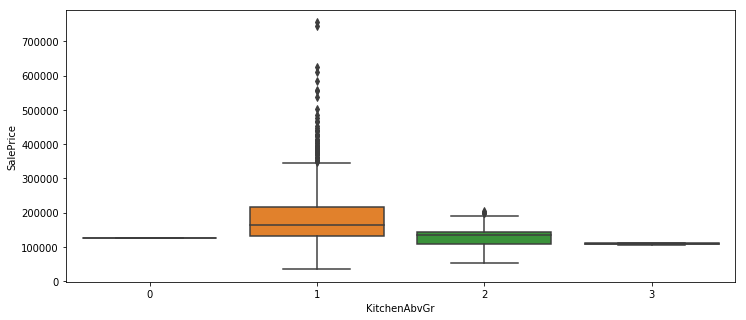

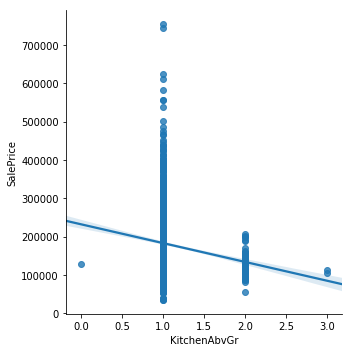

-------------------------------------------------------------------------------------------------------------------
Variável: TotRmsAbvGrd


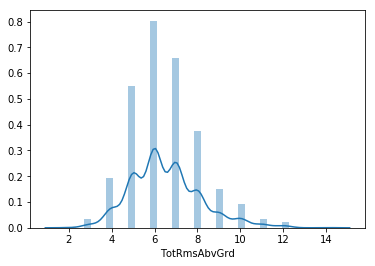

 
Média: 6.517808219178082
DesvioPadrão: 1.625393290584064
 


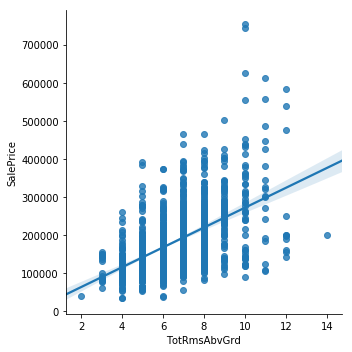

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: Fireplaces
[0 1 2 3]
 
           SalePrice                                         
               count        sum           mean            std
Fireplaces                                                   
0                690   97518723  141331.482609   44389.786884
1                650  137698541  211843.909231   79531.825318
2                115   27667682  240588.539130  117451.800525
3                  5    1260000  252000.000000   93313.986090
 


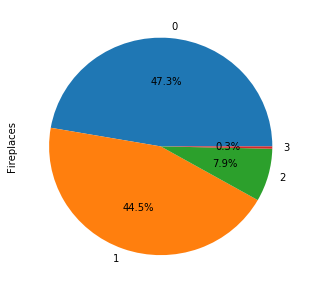

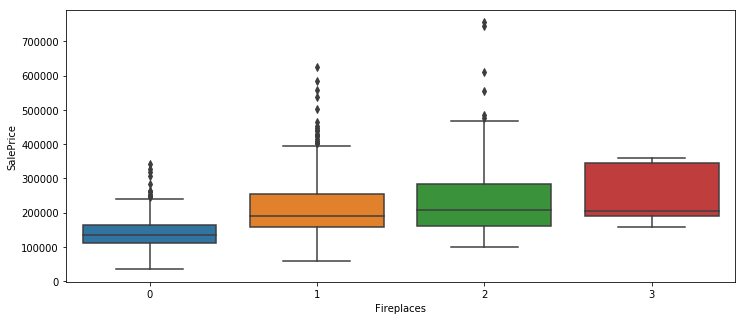

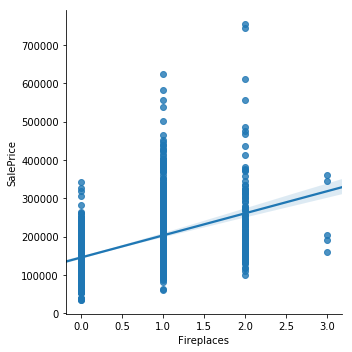

-------------------------------------------------------------------------------------------------------------------
Variável: GarageYrBlt


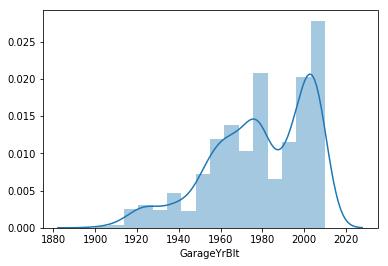

 
Média: 1978.5061638868744
DesvioPadrão: 23.99458325905758
 


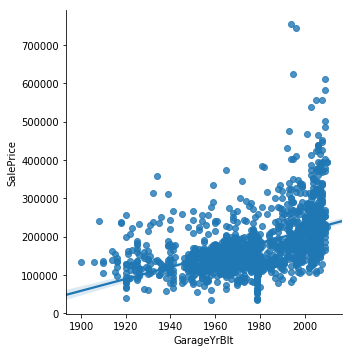

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: GarageCars
[2 3 1 0 4]
 
           SalePrice                                         
               count        sum           mean            std
GarageCars                                                   
0                 81    8368700  103317.283951   32815.023389
1                369   47275058  128116.688347   30412.386890
2                824  151493771  183851.663835   51617.144258
3                181   56044138  309636.121547  106832.925939
4                  5     963279  192655.800000   52621.839745
 


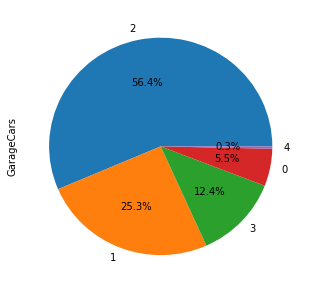

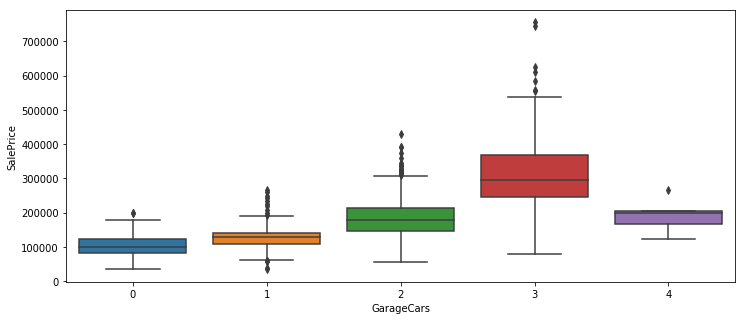

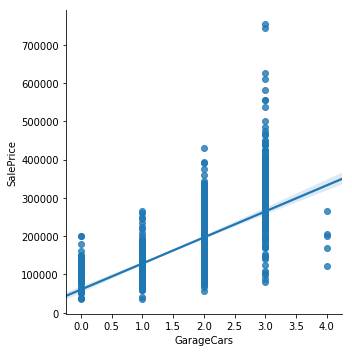

-------------------------------------------------------------------------------------------------------------------
Variável: GarageArea


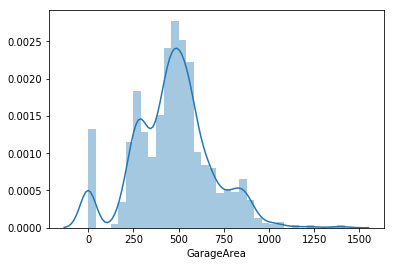

 
Média: 472.9801369863014
DesvioPadrão: 213.80484145338076
 


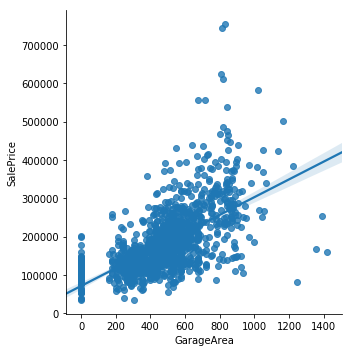

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: WoodDeckSF


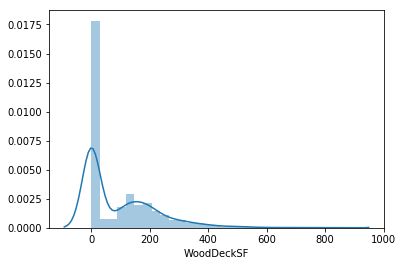

 
Média: 94.2445205479452
DesvioPadrão: 125.33879435172359
 


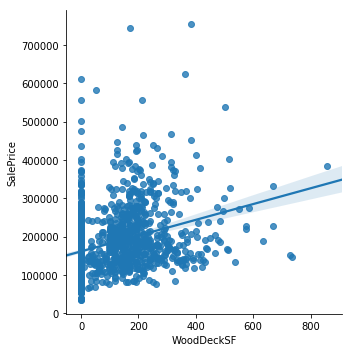

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: OpenPorchSF


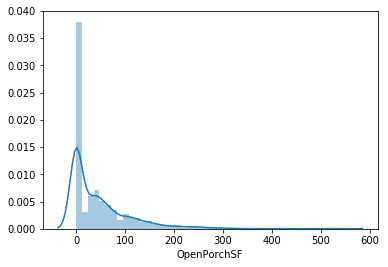

 
Média: 46.66027397260274
DesvioPadrão: 66.25602767664974
 


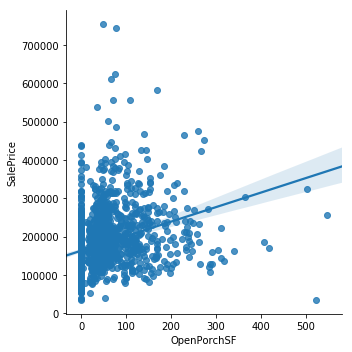

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: EnclosedPorch


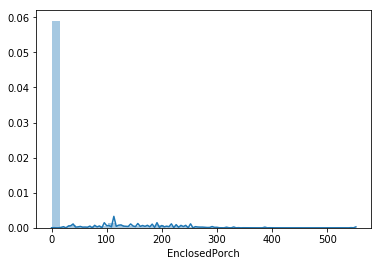

 
Média: 21.954109589041096
DesvioPadrão: 61.11914860172879
 


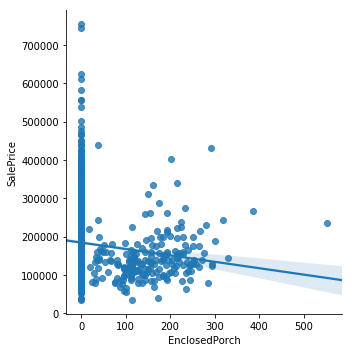

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: 3SsnPorch


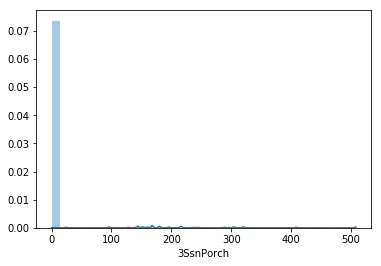

 
Média: 3.4095890410958902
DesvioPadrão: 29.317330556782203
 


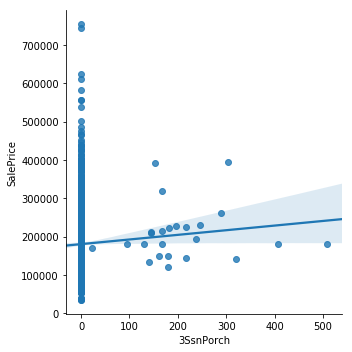

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: ScreenPorch


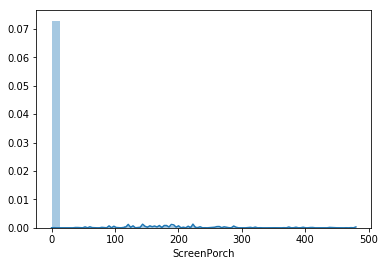

 
Média: 15.060958904109588
DesvioPadrão: 55.757415281874486
 


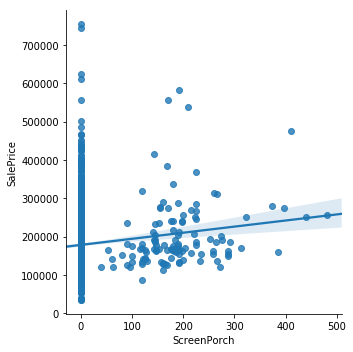

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: PoolArea


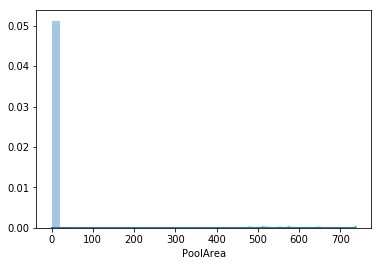

 
Média: 2.758904109589041
DesvioPadrão: 40.17730694453043
 


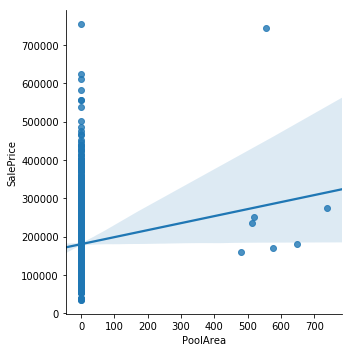

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: MiscVal


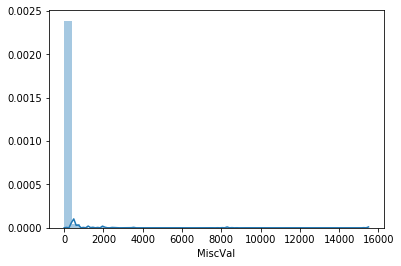

 
Média: 43.489041095890414
DesvioPadrão: 496.1230244579311
 


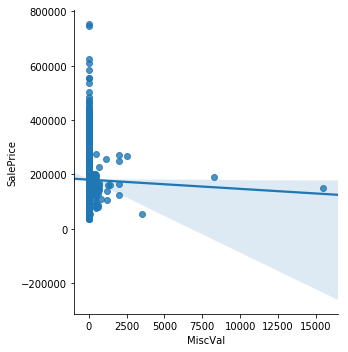

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: MoSold


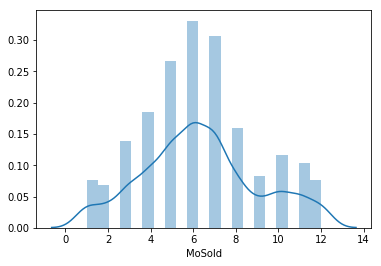

 
Média: 6.321917808219178
DesvioPadrão: 2.7036262083595197
 


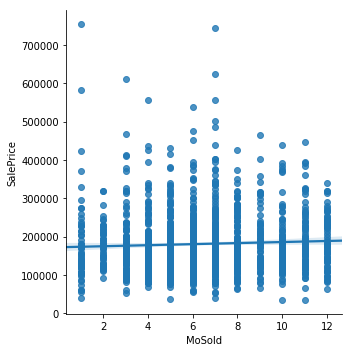

 
-------------------------------------------------------------------------------------------------------------------
 
Variável: YrSold
[2008 2007 2006 2009 2010]
 
       SalePrice                                       
           count       sum           mean           std
YrSold                                                 
2006         314  57320530  182549.458599  79426.838855
2007         329  61214777  186063.151976  85768.171410
2008         304  53917695  177360.838816  69735.610685
2009         338  60648051  179432.103550  80879.237311
2010         175  31043893  177393.674286  80451.280085
 


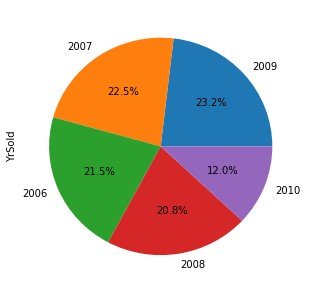

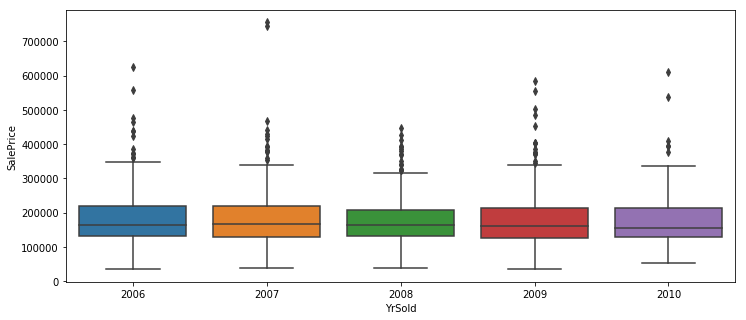

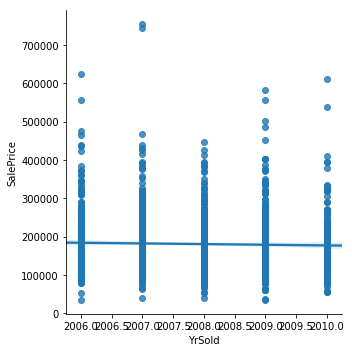

-------------------------------------------------------------------------------------------------------------------
Análise das Variáveis Conjuntas
 
-------------------------------------------------------------------------------------------------------------------
 
Matriz de Correlação


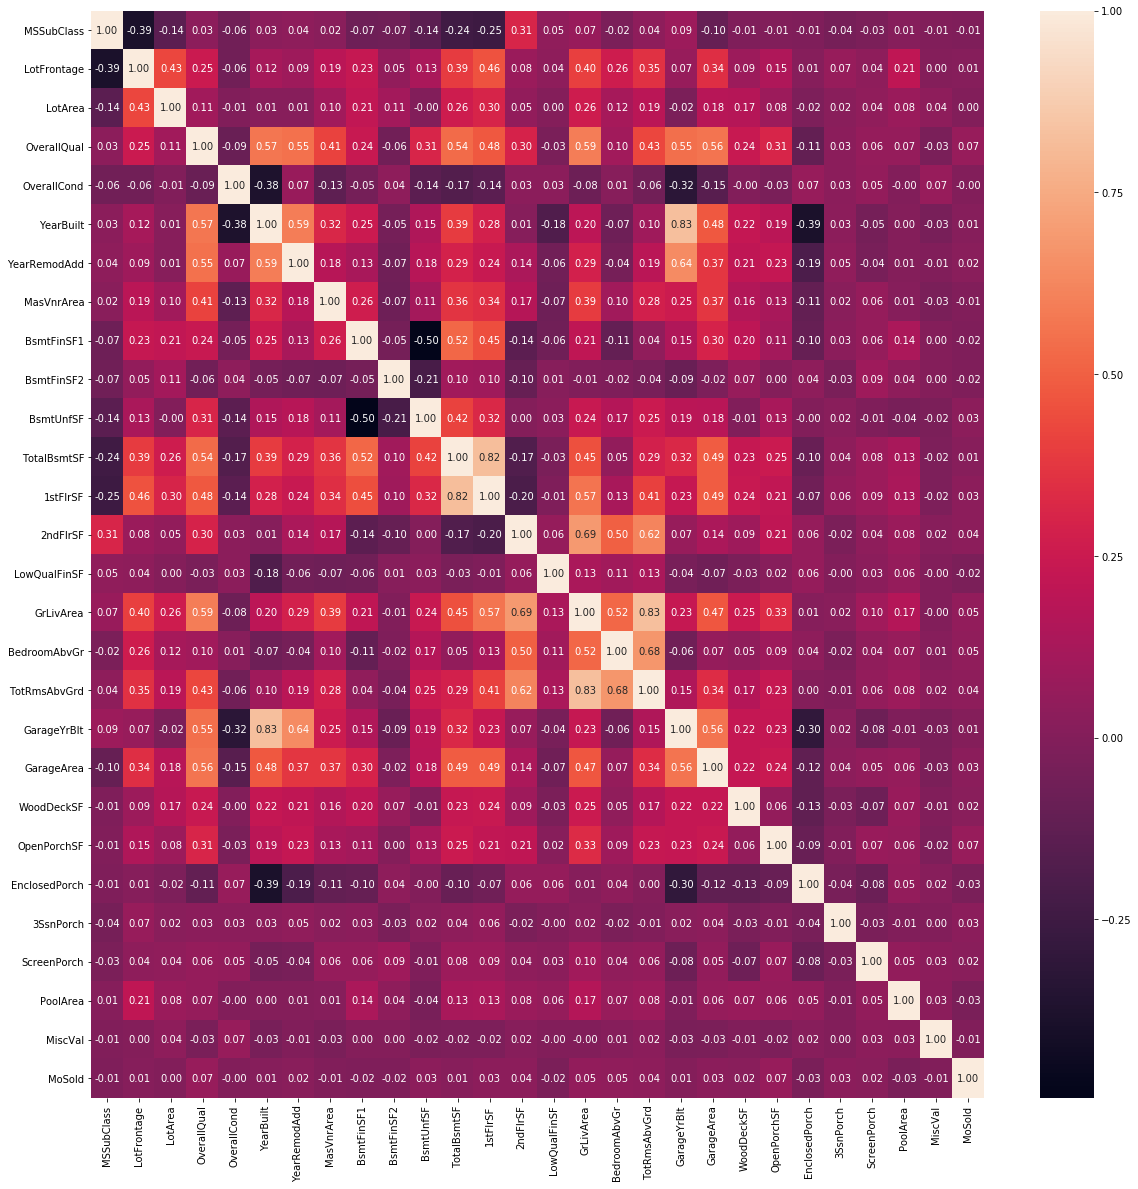

 
-------------------------------------------------------------------------------------------------------------------
 


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


 
-------------------------------------------------------------------------------------------------------------------
 
Importância das Variáveis
 
-------------------------------------------------------------------------------------------------------------------
 


/Users/rafaeladolfo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:157: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
foda_reg(diretorio,chave,alvo)